In [1]:

'''
Editor: @Hyunhomo
Reference: https://github.com/TobiasGlaubach/python-ml-turbofan
'''

## Import libraries in python
import os
from tqdm import tqdm

import pandas as pd
import padasip as pa
# pa.filters.FilterRLS(n)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import importlib
from scipy.stats import randint, expon, uniform

import sklearn as sk
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

num_cycles = 3000000


In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
        
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
df_train_ttf_merged = pd.read_csv('Data/01_M02_DC_train_ttf_merged.csv')
df_train_ttf_merged


time   Tool  stage   Lot    runnum  recipe  recipe_step  \
0         3283834  01M02      1  9253  10511673      67            1   
1         3283838  01M02      1  9253  10511673      67            1   
2         3283842  01M02      1  9253  10511673      67            1   
3         3283846  01M02      1  9253  10511673      67            1   
4         3283850  01M02      1  9253  10511673      67            1   
...           ...    ...    ...   ...       ...     ...          ...   
2915372  25136960  01M02      1  9607  11898991      67           23   
2915373  25136964  01M02      1  9607  11898991      67           23   
2915374  25136968  01M02      1  9607  11898991      67           23   
2915375  25136972  01M02      1  9607  11898991      67           23   
2915376  25136976  01M02      1  9607  11898991      67           23   

         IONGAUGEPRESSURE  ETCHBEAMVOLTAGE  ETCHBEAMCURRENT  ...  \
0               -0.079428        -0.958814        -0.959509  ...   
1               -0.079419        -0.958928        -0.959651  ...   
2               -0.079409        -0.959156        -0.960006  ...   
3               -0.079420        -0.958928        -0.959297  ...   
4               -0.079430        -0.959269        -0.959438  ...   
...                   ...              ...              ...  ...   
2915372         -0.022719         1.545407         0.770271  ...   
2915373         -0.022719         1.545526         0.769633  ...   
2915374         -0.022719         1.545763         0.771405  ...   
2915375         -0.022719         1.546096         0.770556  ...   
2915376         -0.022719         1.545930         0.771832  ...   

         ACTUALROTATIONANGLE  FIXTURESHUTTERPOSITION  ETCHSOURCEUSAGE  \
0                  -0.122437                     0.0         2.395370   
1                  -0.122437                     0.0         2.395370   
2                  -0.122437                     0.0         2.395370   
3                  -0.122437                     0.0         2.395370   
4                  -0.122437                     0.0         2.395370   
...                      ...                     ...              ...   
2915372            -0.122446                     1.0        -0.433824   
2915373            -0.122446                     1.0        -0.433821   
2915374            -0.122446                     1.0        -0.433818   
2915375            -0.122446                     1.0        -0.433814   
2915376            -0.122446                     1.0        -0.433811   

         ETCHAUXSOURCETIMER  ETCHAUX2SOURCETIMER  ACTUALSTEPDURATION  \
0                  2.871511             3.175941            4.037785   
1                  2.871511             3.175941            4.037785   
2                  2.871511             3.175941            4.037785   
3                  2.871511             3.175941            4.037785   
4                  2.871511             3.175941            4.037785   
...                     ...                  ...                 ...   
2915372           -0.233806            -0.052424           -0.657107   
2915373           -0.233803            -0.052420           -0.657107   
2915374           -0.233799            -0.052416           -0.657107   
2915375           -0.233793            -0.052410           -0.657107   
2915376           -0.233791            -0.052408           -0.657107   

         TTF_FlowCool Pressure Dropped Below Limit  \
0                                         623234.0   
1                                         623230.0   
2                                         623226.0   
3                                         623222.0   
4                                         623218.0   
...                                            ...   
2915372                                       16.0   
2915373                                       12.0   
2915374                                        8.0   
2915375                                        4.

In [4]:
df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == 1]

time   Tool  stage   Lot    runnum  recipe  recipe_step  \
0       3283834  01M02      1  9253  10511673      67            1   
1       3283838  01M02      1  9253  10511673      67            1   
2       3283842  01M02      1  9253  10511673      67            1   
3       3283846  01M02      1  9253  10511673      67            1   
4       3283850  01M02      1  9253  10511673      67            1   
...         ...    ...    ...   ...       ...     ...          ...   
131029  3907052  01M02      1  9361  10548007      67           43   
131030  3907056  01M02      1  9361  10548007      67           43   
131031  3907060  01M02      1  9361  10548007      67           43   
131032  3907064  01M02      1  9361  10548007      67           43   
131033  3907068  01M02      1  9361  10548007      67           43   

        IONGAUGEPRESSURE  ETCHBEAMVOLTAGE  ETCHBEAMCURRENT  ...  \
0              -0.079428        -0.958814        -0.959509  ...   
1              -0.079419        -0.958928        -0.959651  ...   
2              -0.079409        -0.959156        -0.960006  ...   
3              -0.079420        -0.958928        -0.959297  ...   
4              -0.079430        -0.959269        -0.959438  ...   
...                  ...              ...              ...  ...   
131029         -0.022398         1.188186         0.780769  ...   
131030         -0.022398         1.189893         0.784031  ...   
131031         -0.022398         1.188244         0.785806  ...   
131032         -0.022398         1.188586         0.788856  ...   
131033         -0.022398         1.188755         0.789706  ...   

        ACTUALROTATIONANGLE  FIXTURESHUTTERPOSITION  ETCHSOURCEUSAGE  \
0                 -0.122437                     0.0         2.395370   
1                 -0.122437                     0.0         2.395370   
2                 -0.122437                     0.0         2.395370   
3                 -0.122437                     0.0         2.395370   
4                 -0.122437                     0.0         2.395370   
...                     ...                     ...              ...   
131029            -0.122455                     1.0         2.787061   
131030            -0.122455                     1.0         2.787064   
131031            -0.122455                     1.0         2.787067   
131032            -0.122455                     1.0         2.787070   
131033            -0.122455                     1.0         2.787074   

        ETCHAUXSOURCETIMER  ETCHAUX2SOURCETIMER  ACTUALSTEPDURATION  \
0                 2.871511             3.175941            4.037785   
1                 2.871511             3.175941            4.037785   
2                 2.871511             3.175941            4.037785   
3                 2.871511             3.175941            4.037785   
4                 2.871511             3.175941            4.037785   
...                    ...                  ...                 ...   
131029            3.309795             3.631592            0.803526   
131030            3.309799             3.631596            0.803526   
131031            3.309802             3.631600            0.803526   
131032            3.309806             3.631604            0.803526   
131033            3.309810             3.631607            0.803526   

        TTF_FlowCool Pressure Dropped Below Limit  \
0                                        623234.0   
1                                        623230.0   
2                                        623226.0   
3                                        623222.0   
4                                        623218.0   
...                                           ...   
131029                                       16.0   
131030                                       12.0   
131031                                        8.0   
131032                                        4.0   
131033                                        0.0   

        TT

In [5]:
## Load fault data if needed
df_01_M02_train_fault_data = pd.read_csv('Data/01_M02_train_fault_data.csv', nrows = num_cycles)
# pd.set_option('display.max_rows', 1000)
# df_01_M02_train_fault_data
# last time row : 25633658

time_FPDBL_fault = df_01_M02_train_fault_data['time'].loc[df_01_M02_train_fault_data['fault_name'] == 'FlowCool Pressure Dropped Below Limit']
time_FPDBL_fault = time_FPDBL_fault[time_FPDBL_fault<25633658]
print (time_FPDBL_fault)


time_FPDBL_fault_cycle1 = time_FPDBL_fault[time_FPDBL_fault<3907068]
# print (time_FPDBL_fault_cycle1)

0      3907068
1      3915070
4      3918310
5      3937494
6      3940162
7      3958954
8      3962388
9      3968458
11     3971424
12     3973348
13     8059958
14     8072052
15     8105258
16     8123030
18     8124986
19     8125434
20     8127122
21     8132488
22     8136008
53    18057900
55    18074648
56    18097634
57    18108796
58    18139306
64    22575152
65    22779500
66    22793870
67    22828180
74    23630826
76    23834942
77    24521052
78    25002546
80    25136976
Name: time, dtype: int64


Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION',
       'TTF_FlowCool Pressure Dropped Below Limit',
       'TTF_Flowcool Pressure Too High Check Flowcool Pump',
       'TTF_Flowcool leak', 'failure_cycle'],
      dtype='object')


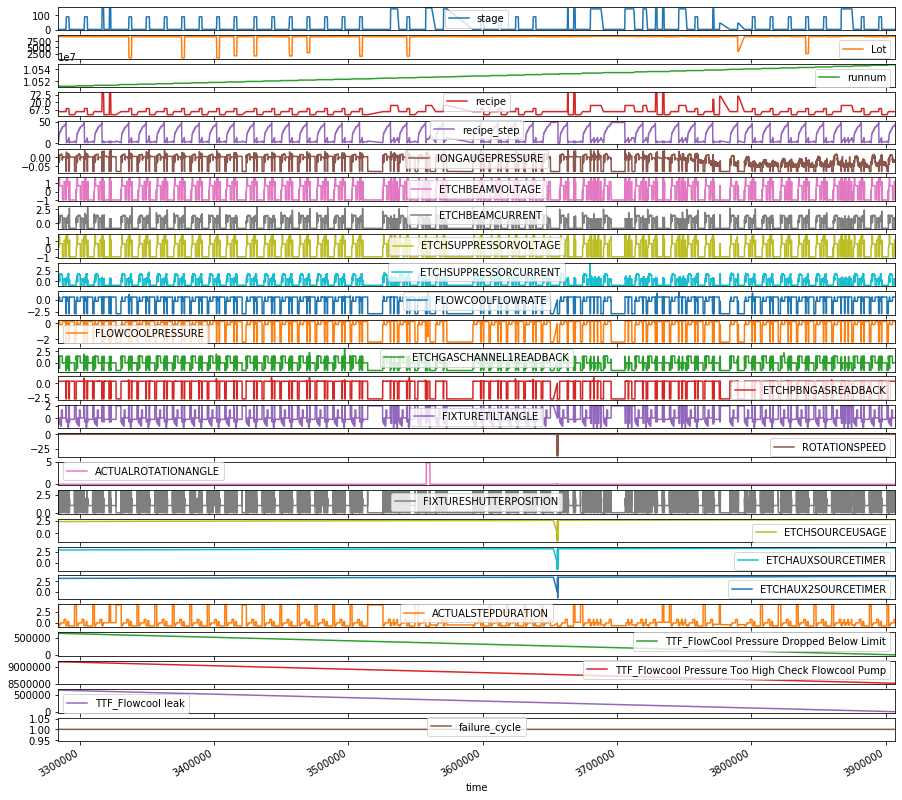

In [6]:
##Plot first cycle 

# df_train_ttf_merged = df_train_ttf_merged[df_train_ttf_merged['recipe_step']!=49]


# cols_attributes = ['time','IONGAUGEPRESSURE','ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORCURRENT', 'ETCHGASCHANNEL1READBACK','FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE']
cols_attributes =  df_train_ttf_merged.columns
print (cols_attributes)
t = pd.DataFrame(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == 1][cols_attributes].values, columns=cols_attributes).plot(x = 'time', subplots=True, figsize=(15, 15))



In [7]:
# function to reshape features into (samples, time steps, features)
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
#     print ("data_matrix", data_matrix)
    print (" data_matrix.shape",  data_matrix.shape)
#     print ("data_matrix.shape[0]", data_matrix.shape[0])
    num_elements = data_matrix.shape[0]
#     print ("num_elements", num_elements)
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements - seq_length - pred_length), range(seq_length, num_elements - pred_length)):
        yield data_matrix[start:stop, :]


        
def gen_target(id_df, seq_length, pred_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
#     print (" data_matrix.shape",  data_matrix.shape)
    num_elements = data_matrix.shape[0]

#     print ("num_elements", num_elements)
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(seq_length, num_elements  -pred_length), range(seq_length + pred_length , num_elements )):
        yield data_matrix[start:stop, :]
        
        
        
def gen_labels(id_df, seq_length, label):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # For one id I put all the labels in a single matrix.
    # For example:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]]
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    # I have to remove the first seq_length labels
    # because for one id the first sequence of seq_length size have as target
    # the last label (the previus ones are discarded).
    # All the next id's sequences will have associated step by step one label as target.
    return data_matrix[seq_length:num_elements- pred_length, :]
        

In [8]:
'''

 data_matrix.shape (13039, 21)
 data_matrix.shape (13039, 21)
 data_matrix.shape (2012, 21)
 data_matrix.shape (481, 21)
 data_matrix.shape (669865, 21)
 data_matrix.shape (5902, 21)
 data_matrix.shape (489, 21)
 data_matrix.shape (112, 21)
 data_matrix.shape (422, 21)
 data_matrix.shape (1380200, 21)
 data_matrix.shape (442303, 21)
 data_matrix.shape (47392, 21)
 data_matrix.shape (133923, 21)
 data_matrix.shape (66772, 21)
 data_matrix.shape (21431, 21)
 
'''

# sequence_length = 100
sequence_length = 60
pred_length = 1

# cycle_idx = 96 # 1~100
# sensor_idx = 14  # 0~13, sensor 2,3,4,7,8,9,11,12,13,14,15,17,20 and 21 in order

# RMSE of first n samples and last n samples
n = 1000

cycle_list = df_train_ttf_merged['failure_cycle'].unique()
cycle_list = cycle_list[[0,1,5,10,11,12,13,14]]
# cycle_list = cycle_list[[4,5,6,11,12,13,14]]
# cycle_list = cycle_list[[0,1,5,11,14]]
# cycle_list = cycle_list[[0,1,5]]
print (len(cycle_list))
print (cycle_list)


8
[ 1  2  6 11 12 13 14 15]


sequence_cols ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'FIXTURETILTANGLE', 'ACTUALSTEPDURATION']
sequence generated, concatenating...
 data_matrix.shape (13039, 11)
 data_matrix.shape (5902, 11)
 data_matrix.shape (442303, 11)
 data_matrix.shape (47392, 11)
 data_matrix.shape (133923, 11)
 data_matrix.shape (66772, 11)
 data_matrix.shape (21431, 11)
concatenated!
 data_matrix.shape (131034, 11)


  0%|          | 3131/730334 [00:00<00:23, 31303.09it/s]

sensor loop 0: IONGAUGEPRESSURE
RLS for adaptation(other cycles)


  2%|▏         | 2763/130972 [00:00<00:04, 27625.09it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 28737.49it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


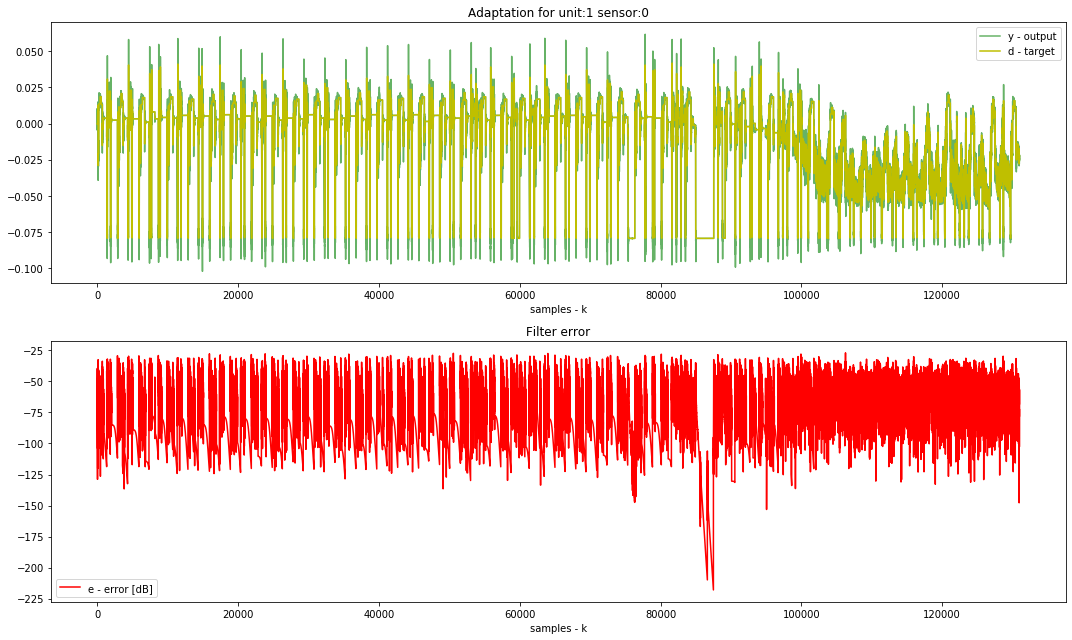

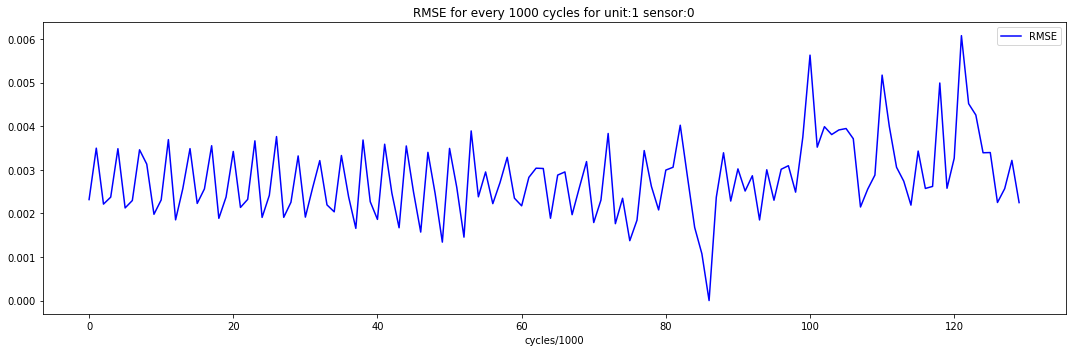

  0%|          | 2942/730334 [00:00<00:24, 29411.54it/s]

sensor loop 1: ETCHBEAMVOLTAGE
RLS for adaptation(other cycles)


  2%|▏         | 2879/130972 [00:00<00:04, 28789.82it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 29348.85it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


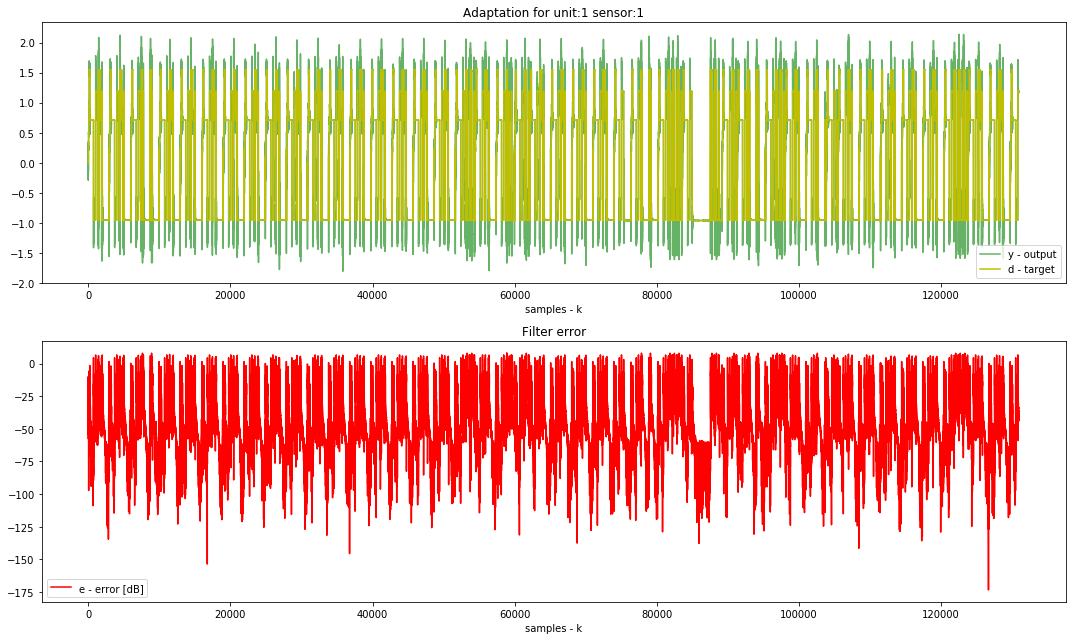

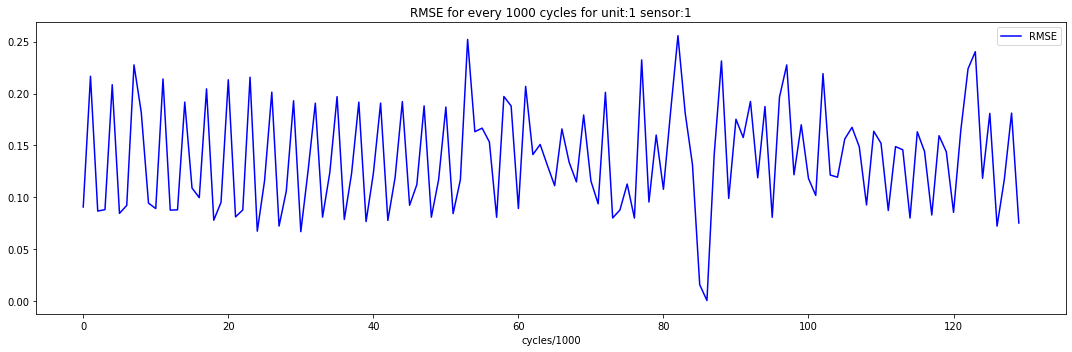

  0%|          | 2437/730334 [00:00<00:29, 24369.38it/s]

sensor loop 2: ETCHBEAMCURRENT
RLS for adaptation(other cycles)


  2%|▏         | 2741/130972 [00:00<00:04, 27404.15it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 27684.63it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


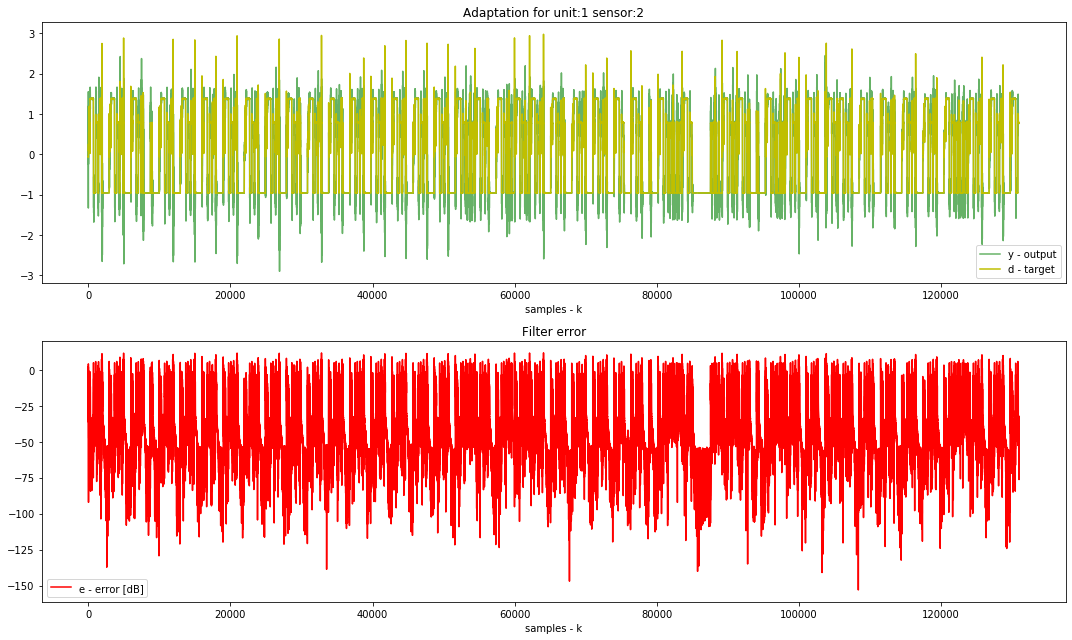

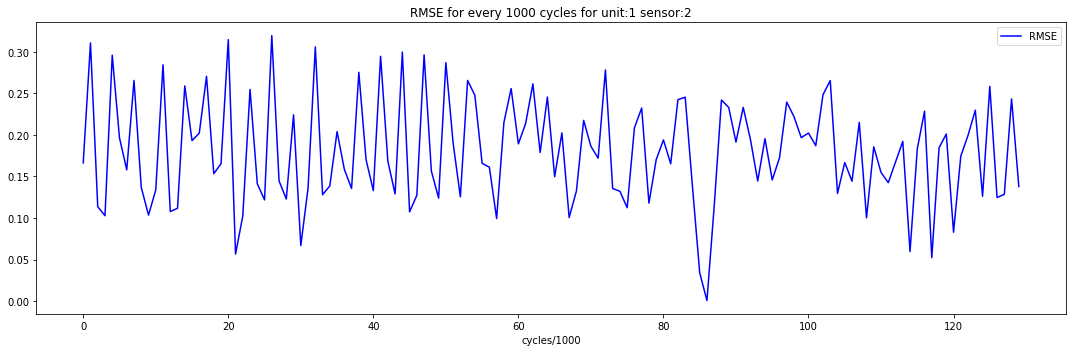

  0%|          | 3060/730334 [00:00<00:23, 30598.72it/s]

sensor loop 3: ETCHSUPPRESSORVOLTAGE
RLS for adaptation(other cycles)


  4%|▎         | 4797/130972 [00:00<00:05, 24007.92it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:05<00:00, 25701.88it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


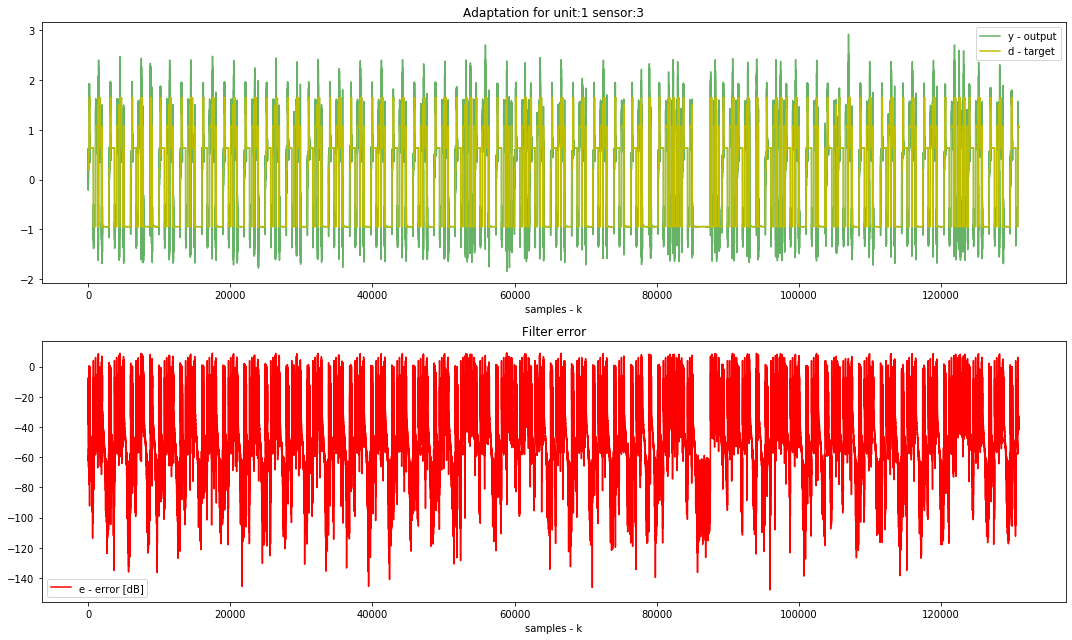

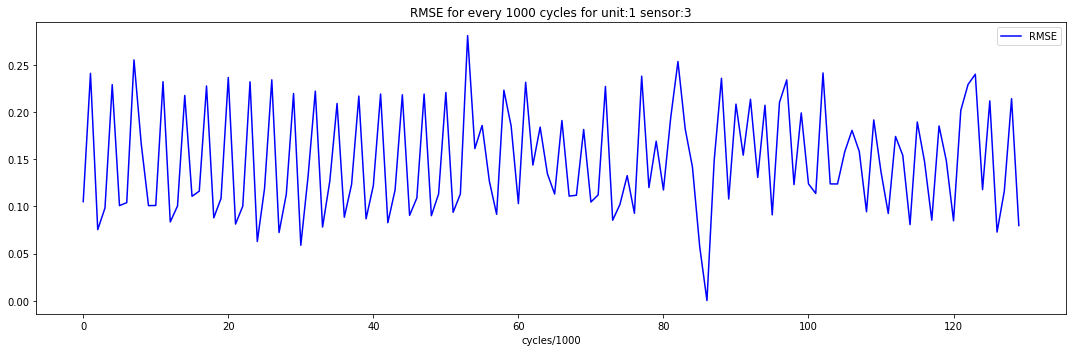

  0%|          | 3078/730334 [00:00<00:23, 30775.85it/s]

sensor loop 4: ETCHSUPPRESSORCURRENT
RLS for adaptation(other cycles)


  5%|▍         | 6009/130972 [00:00<00:04, 30121.48it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 30395.31it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


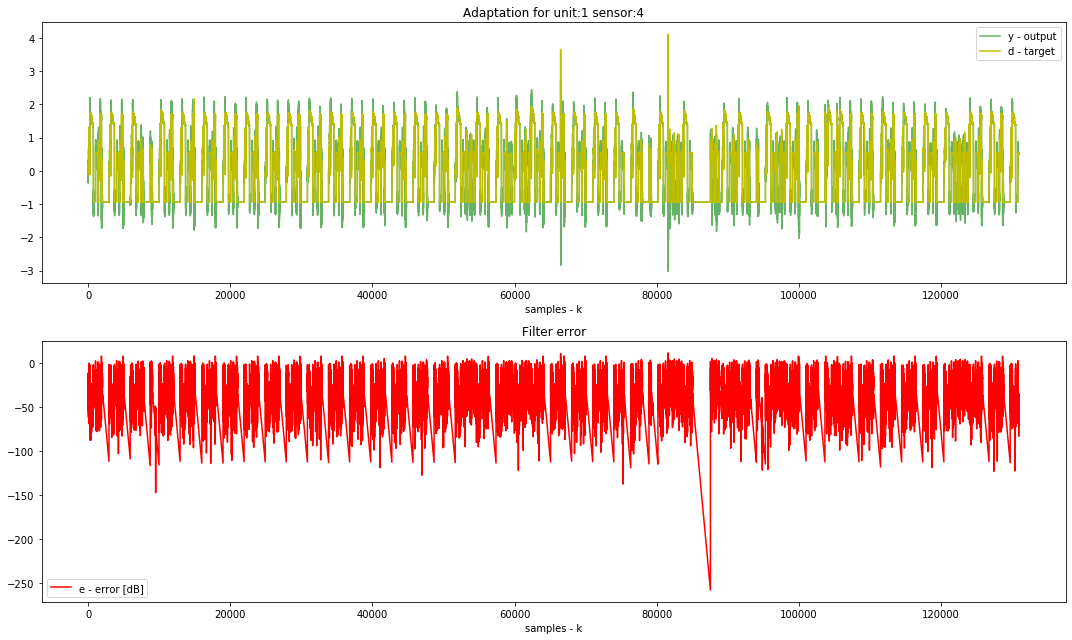

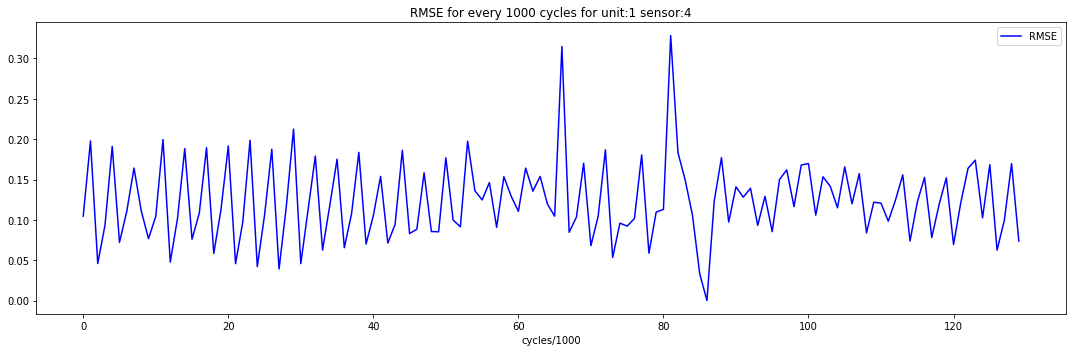

  0%|          | 3080/730334 [00:00<00:23, 30792.10it/s]

sensor loop 5: FLOWCOOLFLOWRATE
RLS for adaptation(other cycles)


  5%|▍         | 5987/130972 [00:00<00:04, 29914.16it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 30465.05it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


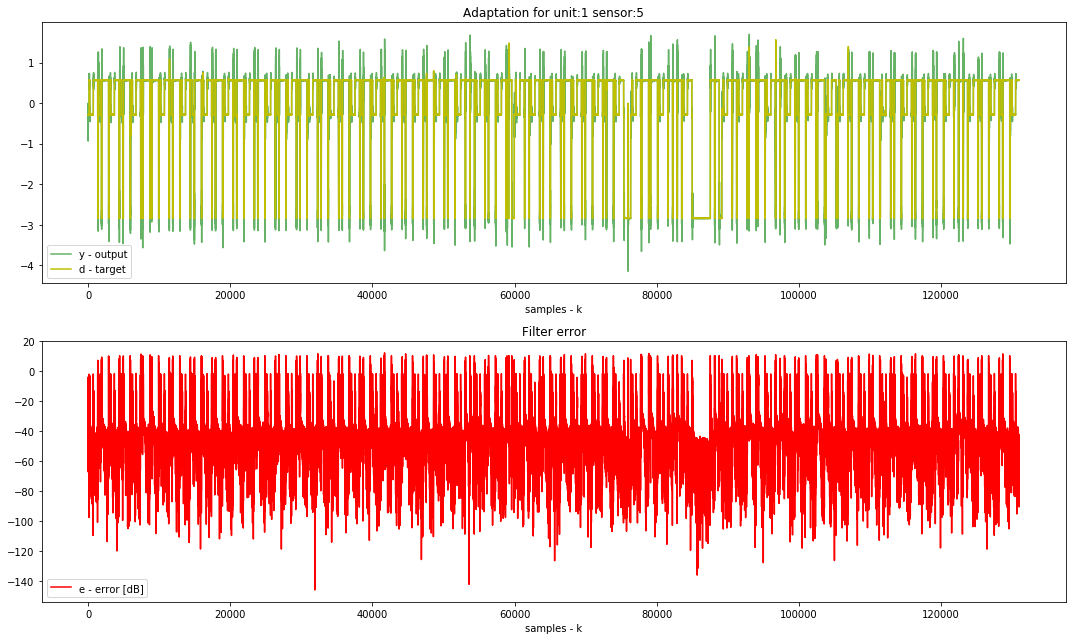

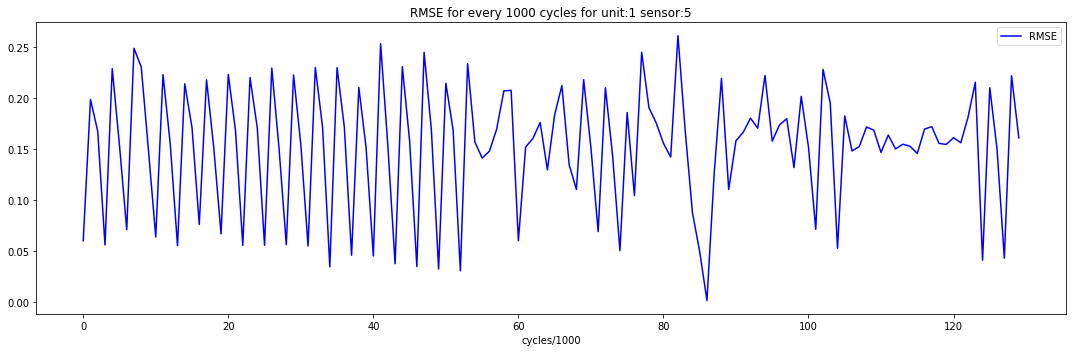

  0%|          | 3275/730334 [00:00<00:22, 32740.27it/s]

sensor loop 6: FLOWCOOLPRESSURE
RLS for adaptation(other cycles)


  5%|▍         | 6138/130972 [00:00<00:04, 30723.27it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 30704.15it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


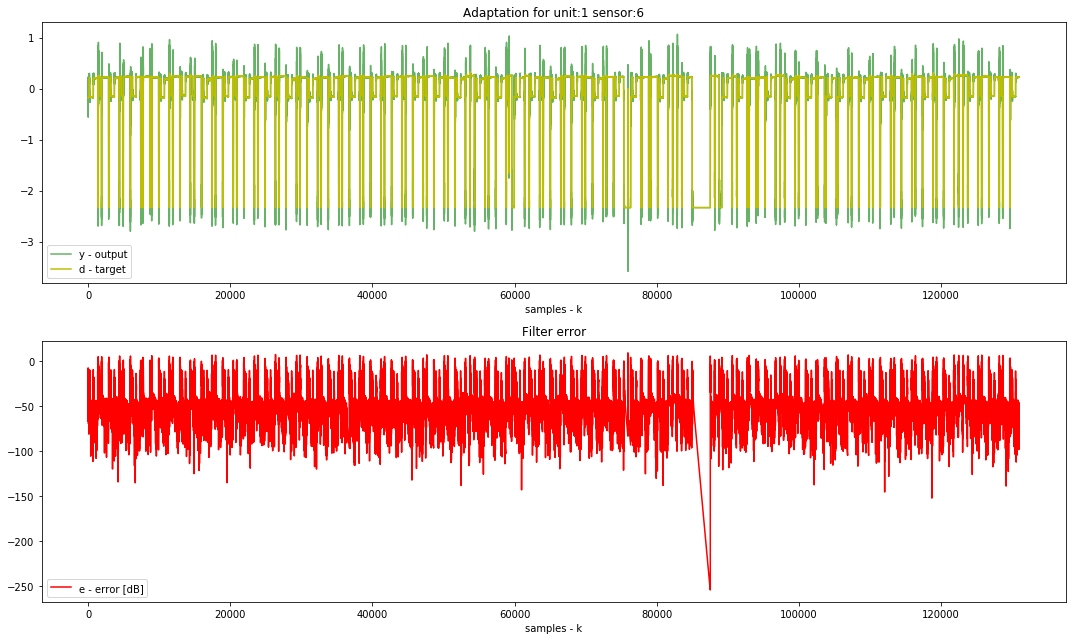

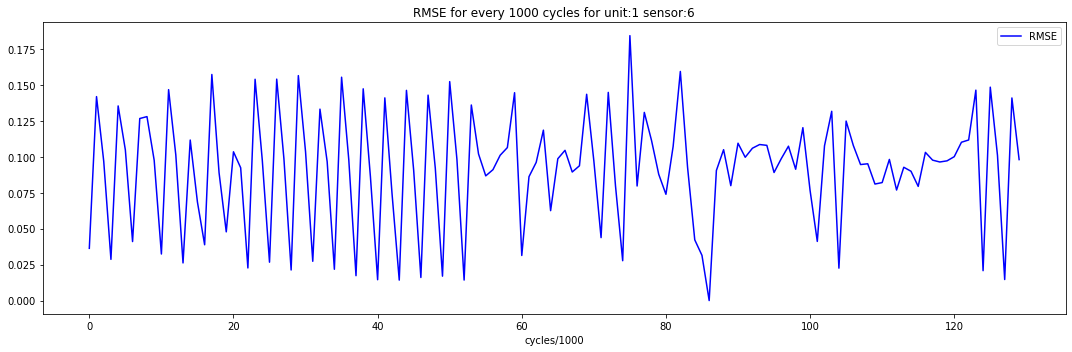

  0%|          | 3116/730334 [00:00<00:23, 31153.20it/s]

sensor loop 7: ETCHGASCHANNEL1READBACK
RLS for adaptation(other cycles)


  4%|▍         | 5371/130972 [00:00<00:04, 26706.74it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 29944.10it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


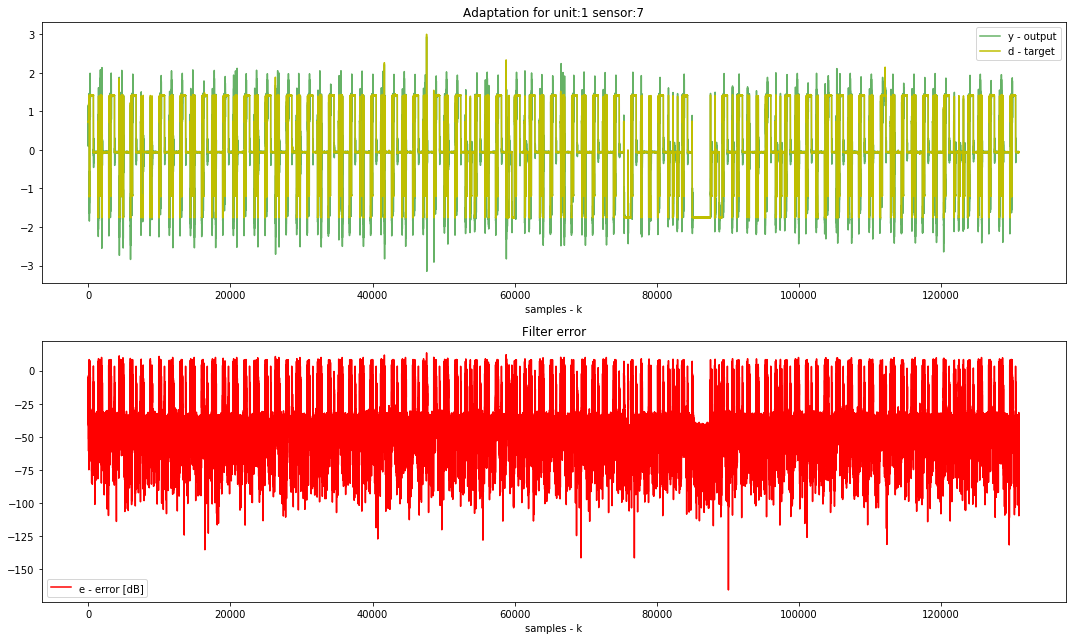

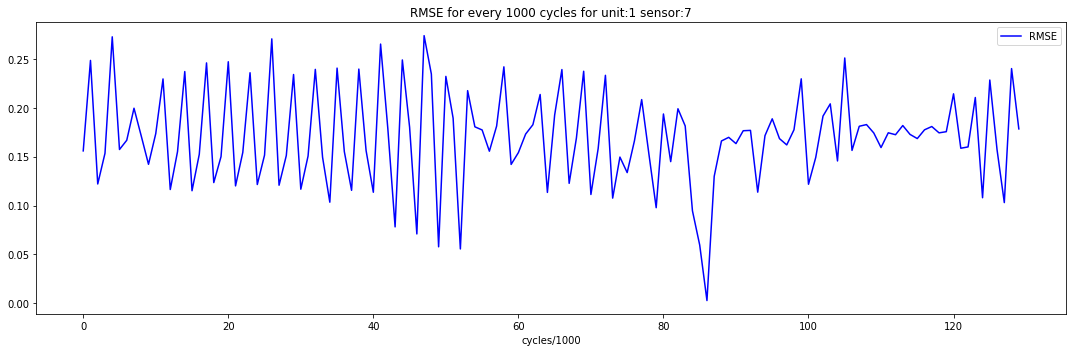

  0%|          | 3088/730334 [00:00<00:23, 30878.56it/s]

sensor loop 8: ETCHPBNGASREADBACK
RLS for adaptation(other cycles)


  2%|▏         | 3070/130972 [00:00<00:04, 30692.42it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 30472.10it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


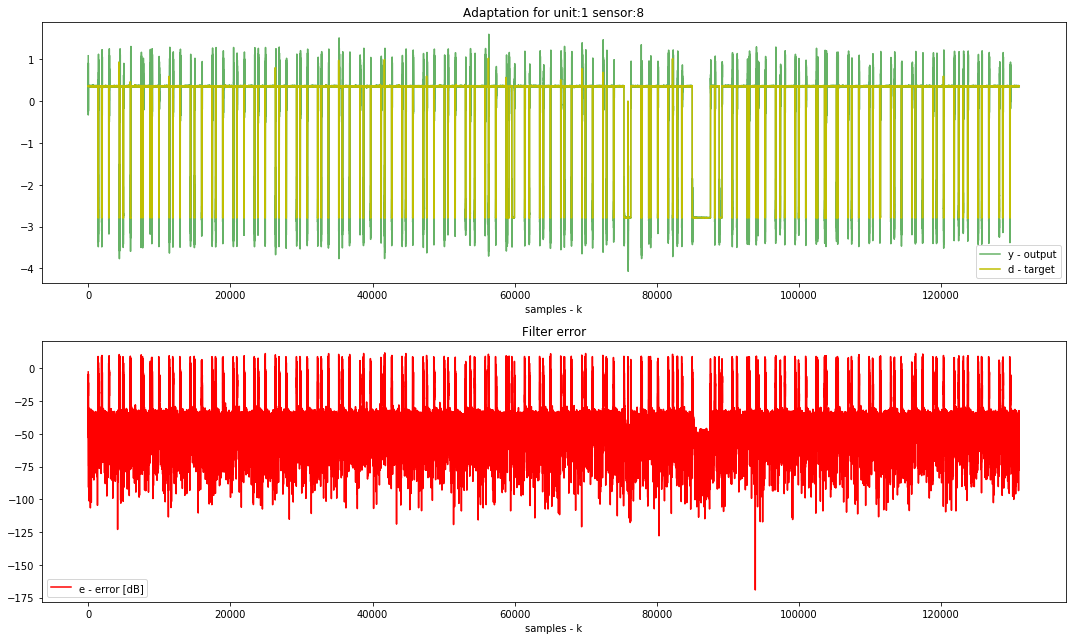

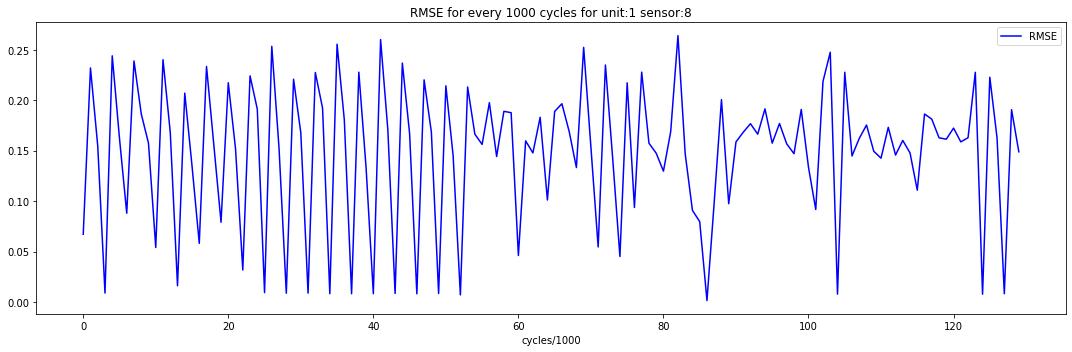

  0%|          | 3146/730334 [00:00<00:23, 31452.83it/s]

sensor loop 9: FIXTURETILTANGLE
RLS for adaptation(other cycles)


  4%|▍         | 5596/130972 [00:00<00:04, 28000.92it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 29876.11it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


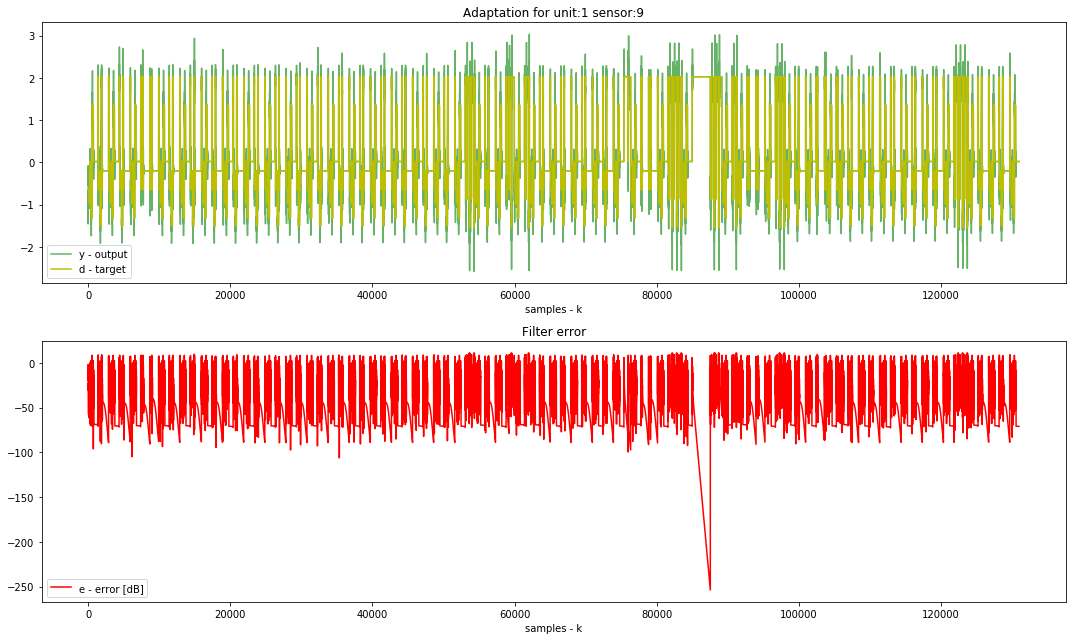

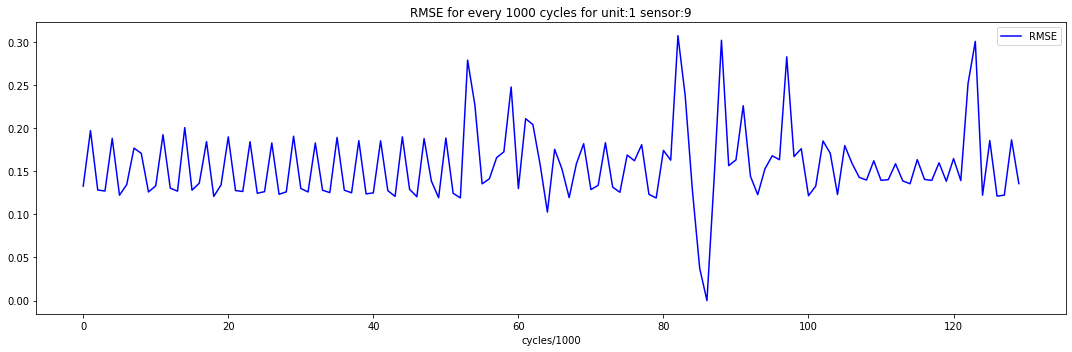

  0%|          | 3125/730334 [00:00<00:23, 31247.65it/s]

sensor loop 10: ACTUALSTEPDURATION
RLS for adaptation(other cycles)


  5%|▍         | 6114/130972 [00:00<00:04, 30606.32it/s]

RLS for selected sensor


100%|██████████| 130972/130972 [00:04<00:00, 31064.21it/s]
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/hyunhomo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


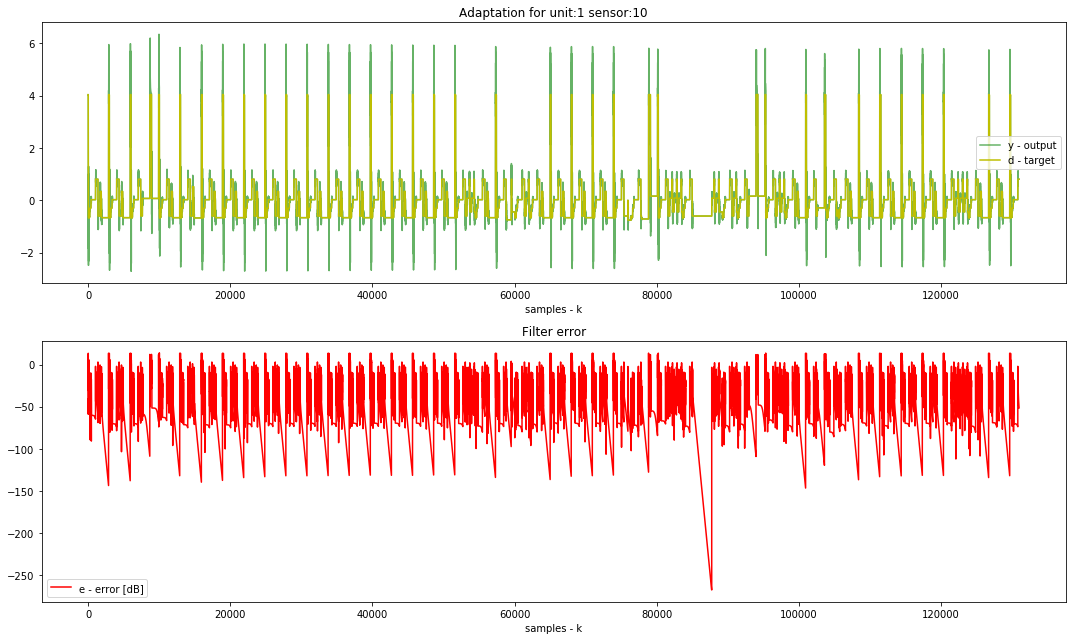

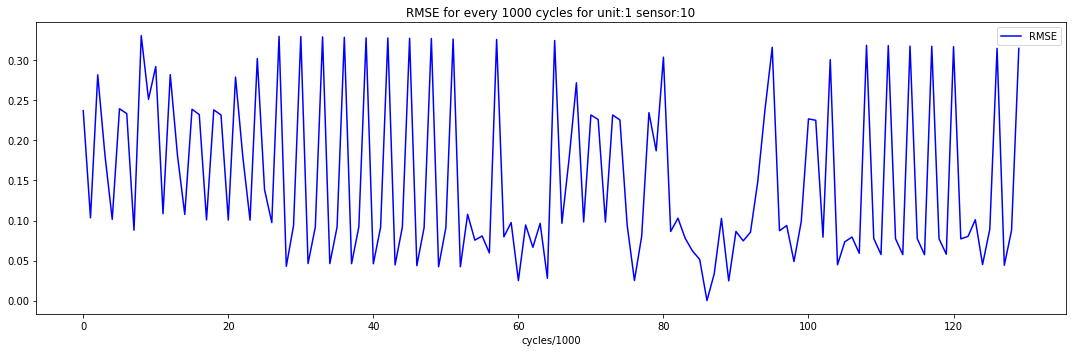

sequence_cols ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'FIXTURETILTANGLE', 'ACTUALSTEPDURATION']
sequence generated, concatenating...
 data_matrix.shape (131034, 11)
 data_matrix.shape (5902, 11)
 data_matrix.shape (442303, 11)
 data_matrix.shape (47392, 11)
 data_matrix.shape (133923, 11)
 data_matrix.shape (66772, 11)
 data_matrix.shape (21431, 11)
concatenated!
 data_matrix.shape (13039, 11)


  0%|          | 0/848329 [00:00<?, ?it/s]

sensor loop 0: IONGAUGEPRESSURE
RLS for adaptation(other cycles)


 23%|██▎       | 3039/12977 [00:00<00:00, 30388.36it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 29705.08it/s]


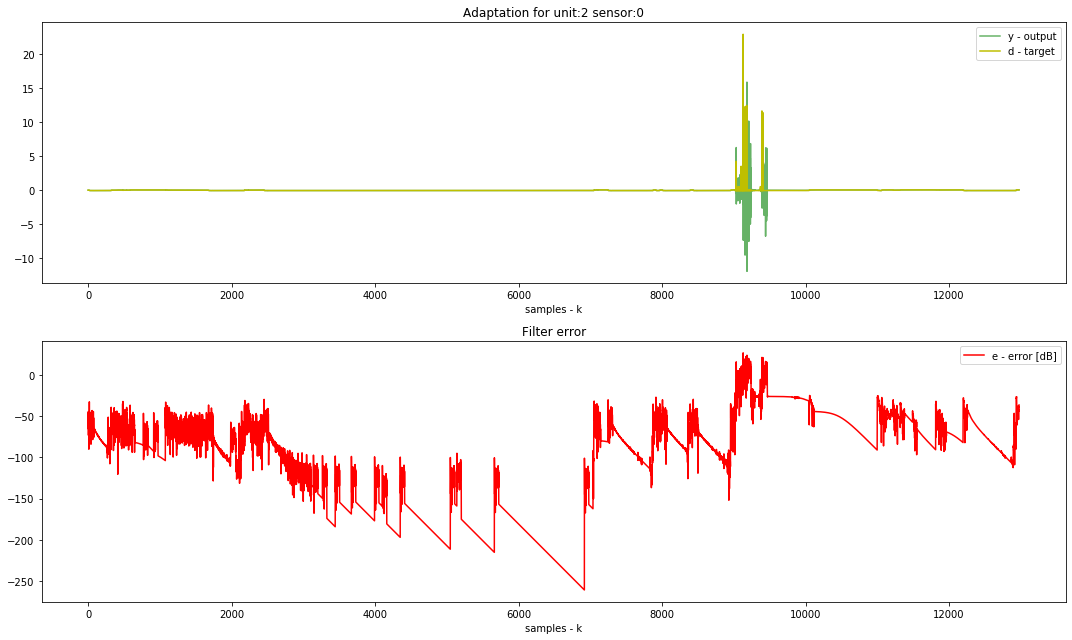

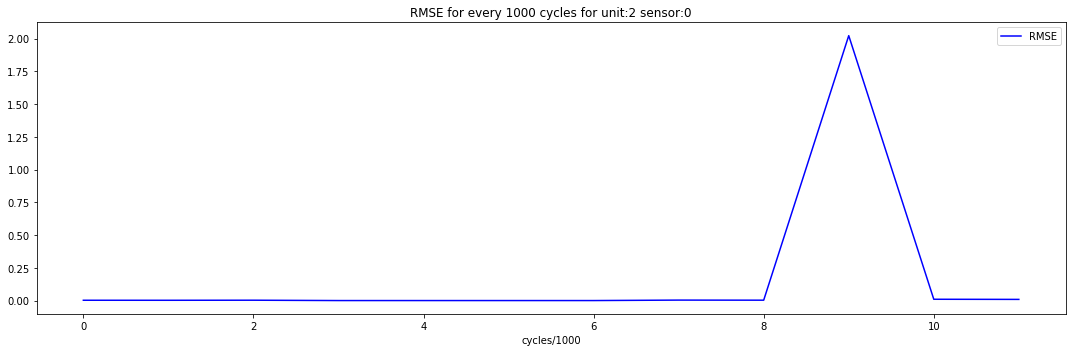

  0%|          | 3303/848329 [00:00<00:25, 33025.39it/s]

sensor loop 1: ETCHBEAMVOLTAGE
RLS for adaptation(other cycles)


 19%|█▉        | 2511/12977 [00:00<00:00, 25102.96it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 25579.12it/s]


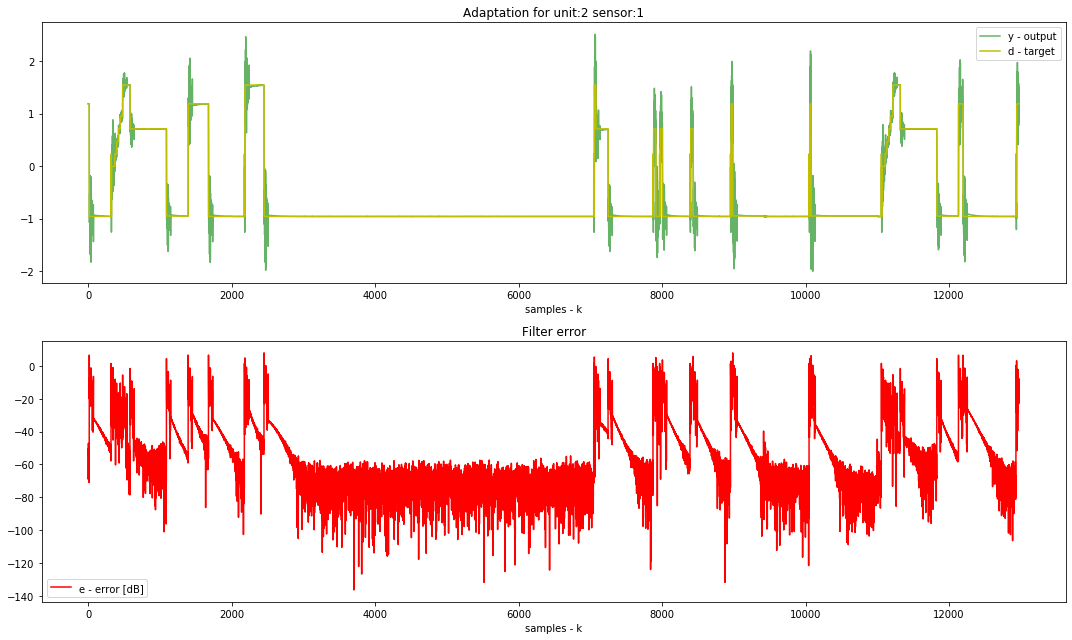

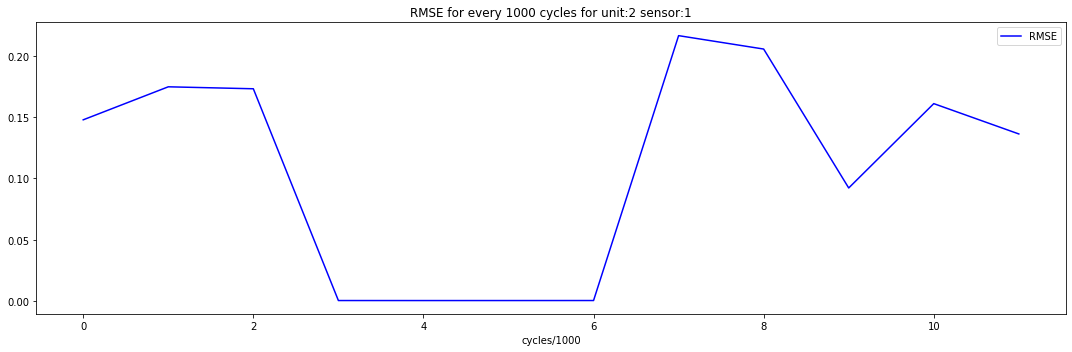

  0%|          | 2815/848329 [00:00<00:30, 28144.26it/s]

sensor loop 2: ETCHBEAMCURRENT
RLS for adaptation(other cycles)


 22%|██▏       | 2896/12977 [00:00<00:00, 28958.72it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 28973.03it/s]


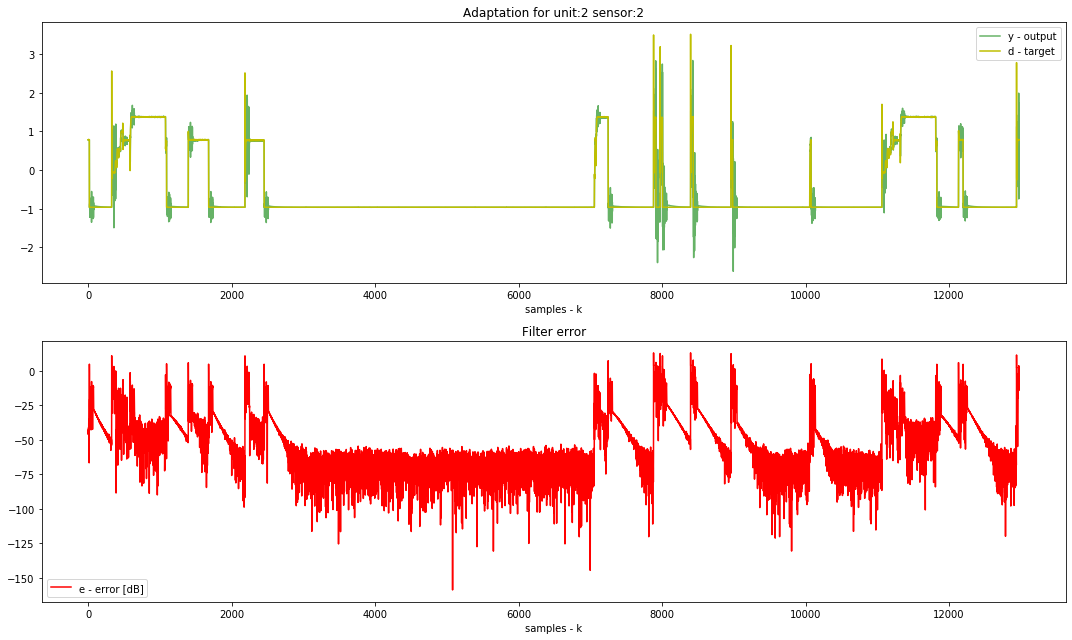

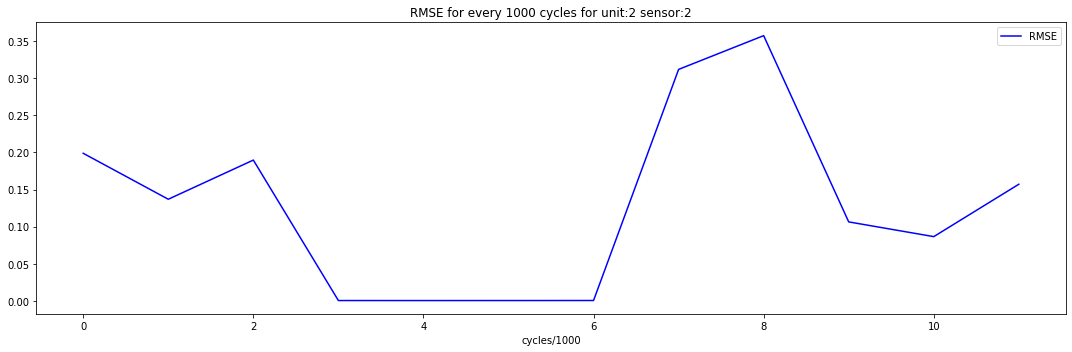

  0%|          | 2364/848329 [00:00<00:35, 23636.64it/s]

sensor loop 3: ETCHSUPPRESSORVOLTAGE
RLS for adaptation(other cycles)


 21%|██        | 2747/12977 [00:00<00:00, 27462.89it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 27977.64it/s]


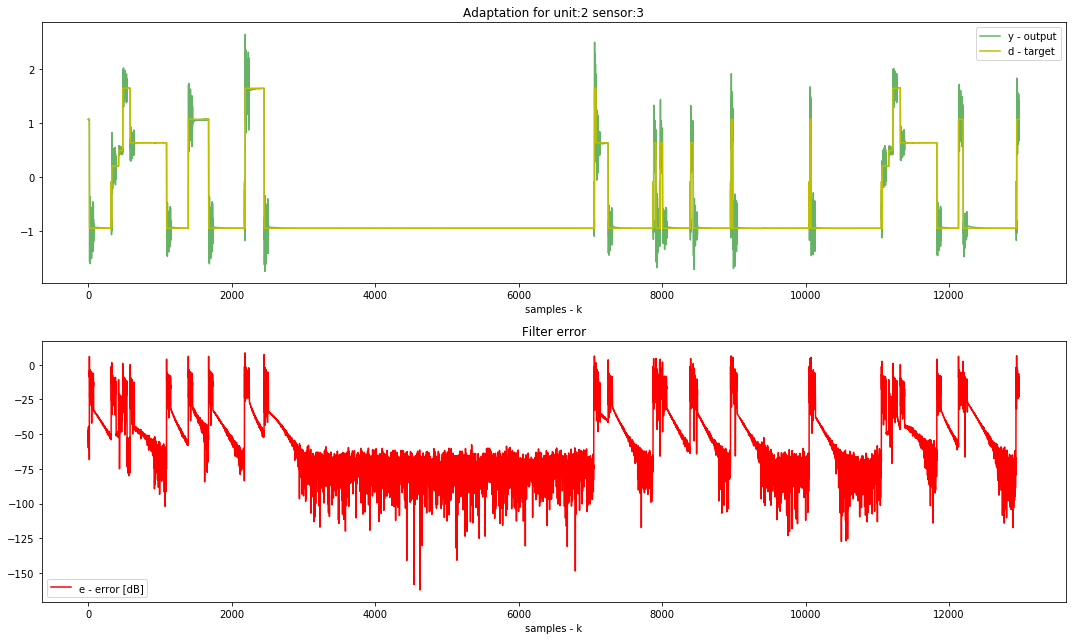

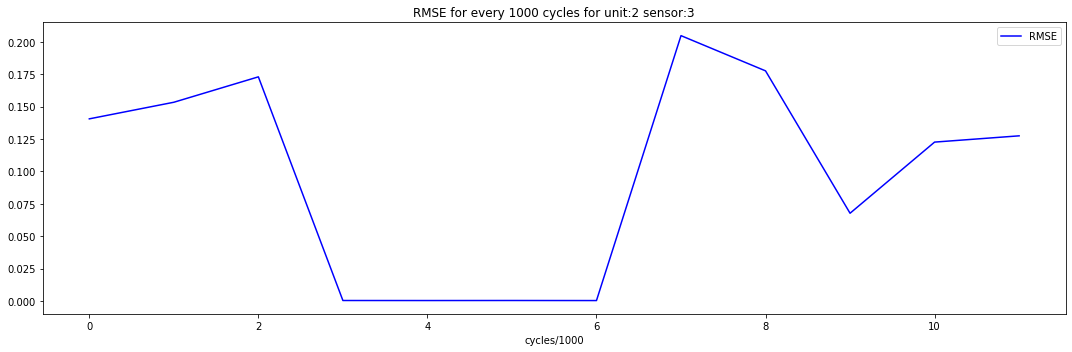

  0%|          | 2747/848329 [00:00<00:30, 27465.90it/s]

sensor loop 4: ETCHSUPPRESSORCURRENT
RLS for adaptation(other cycles)


 22%|██▏       | 2882/12977 [00:00<00:00, 28818.03it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 28583.55it/s]


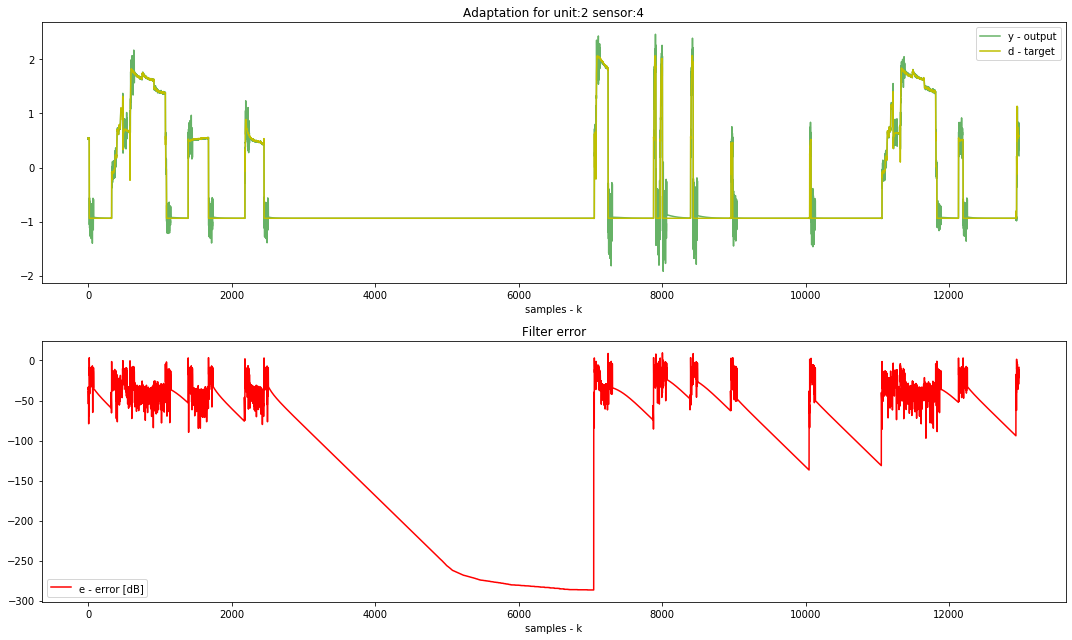

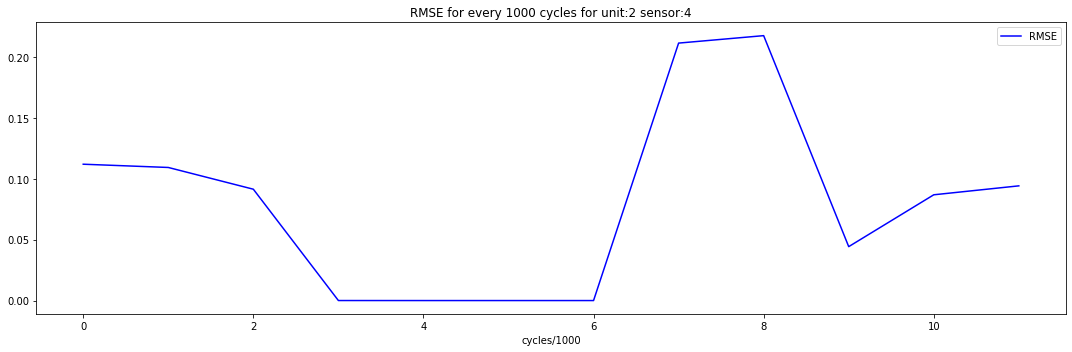

  0%|          | 2881/848329 [00:00<00:29, 28804.74it/s]

sensor loop 5: FLOWCOOLFLOWRATE
RLS for adaptation(other cycles)


 18%|█▊        | 2376/12977 [00:00<00:00, 23758.66it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 26548.23it/s]


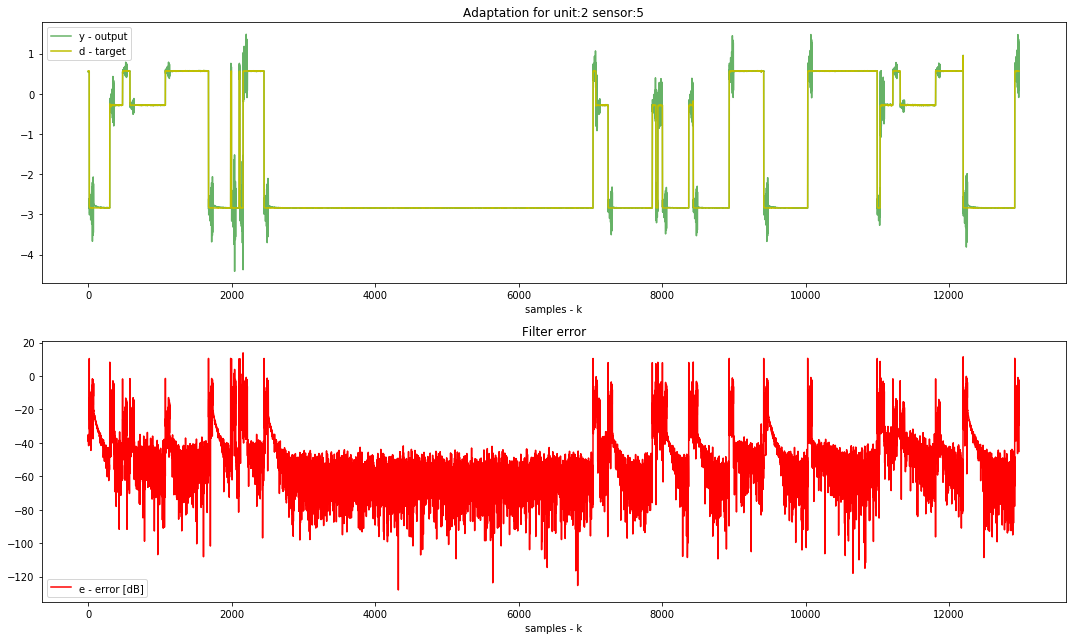

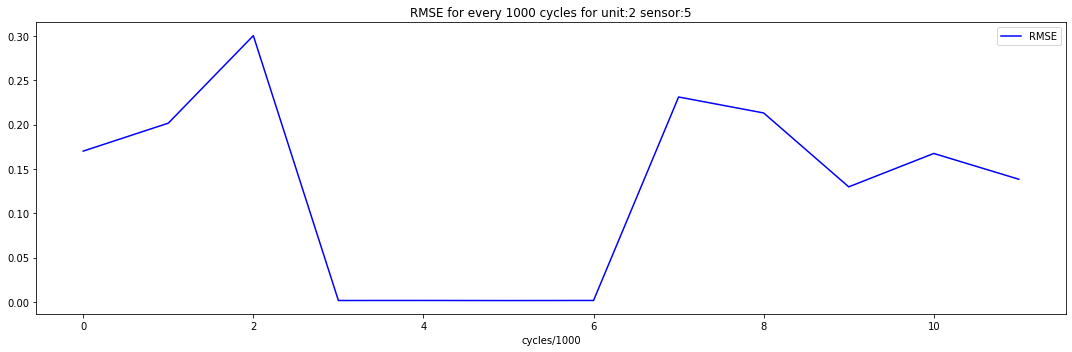

  0%|          | 2971/848329 [00:00<00:28, 29707.34it/s]

sensor loop 6: FLOWCOOLPRESSURE
RLS for adaptation(other cycles)


 43%|████▎     | 5641/12977 [00:00<00:00, 28292.99it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 28387.09it/s]


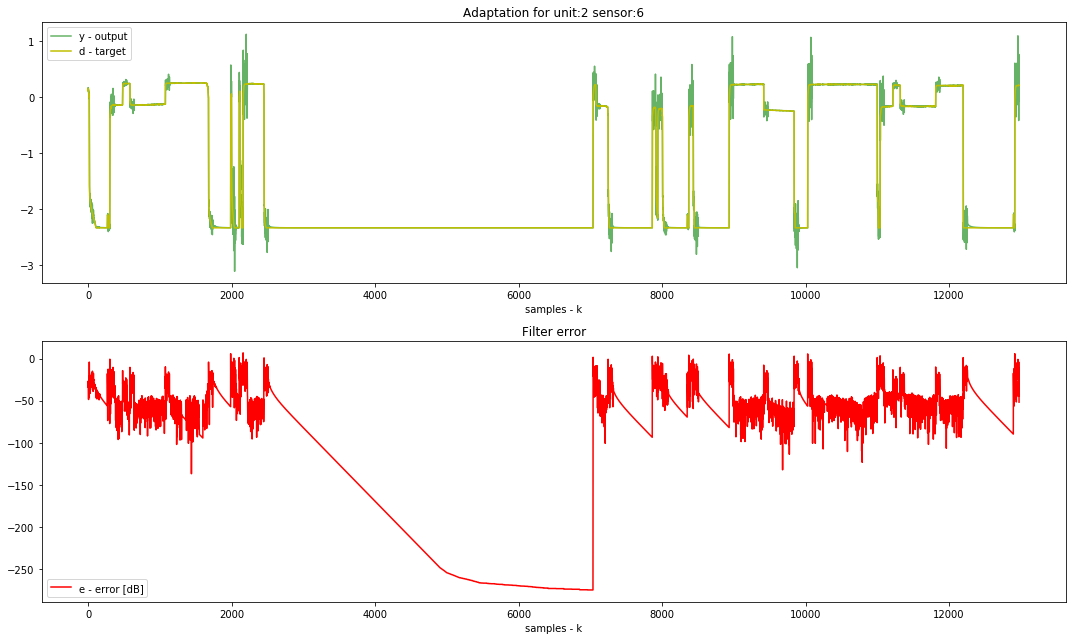

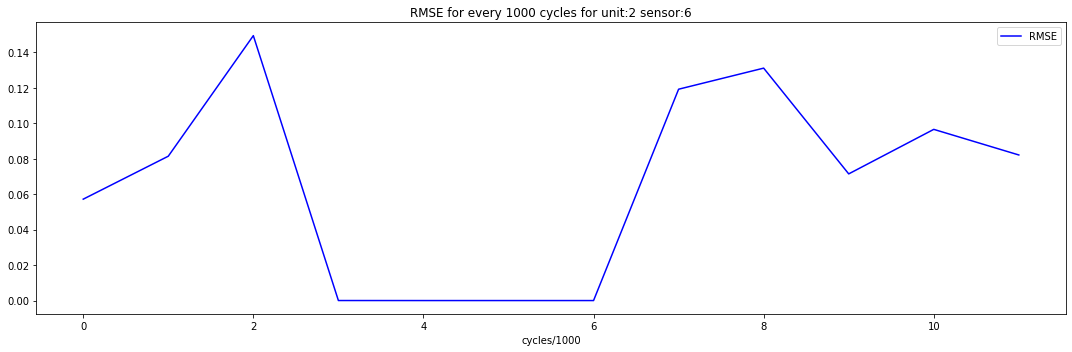

  0%|          | 3036/848329 [00:00<00:27, 30358.80it/s]

sensor loop 7: ETCHGASCHANNEL1READBACK
RLS for adaptation(other cycles)


 19%|█▉        | 2497/12977 [00:00<00:00, 24963.71it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 25119.05it/s]


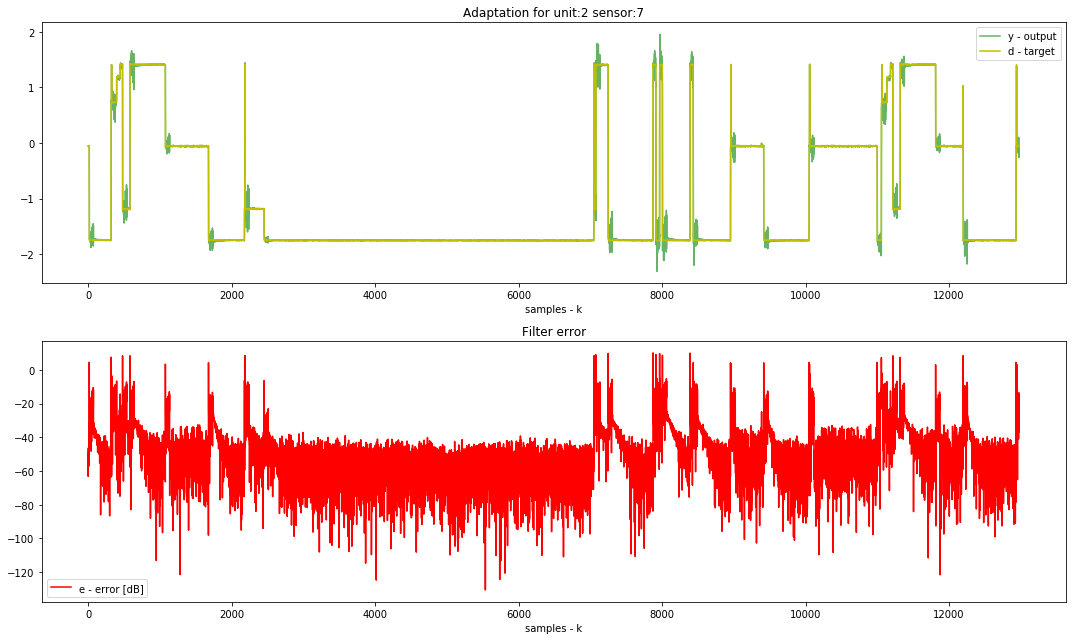

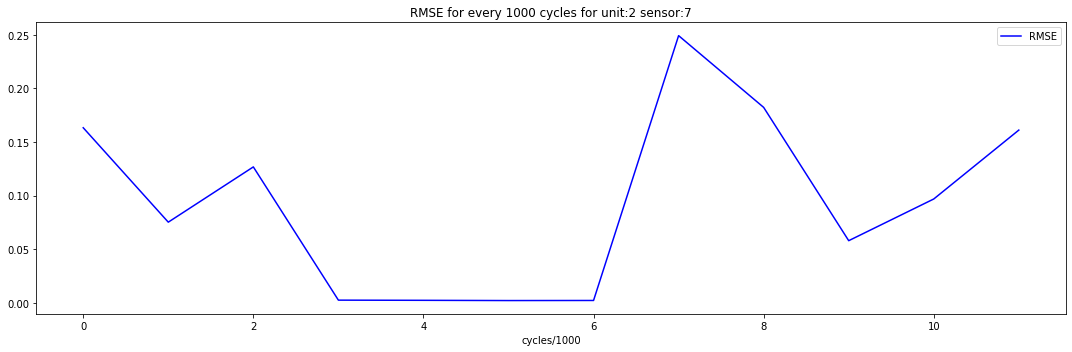

  0%|          | 2468/848329 [00:00<00:34, 24673.08it/s]

sensor loop 8: ETCHPBNGASREADBACK
RLS for adaptation(other cycles)


 22%|██▏       | 2810/12977 [00:00<00:00, 28090.85it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 28284.31it/s]


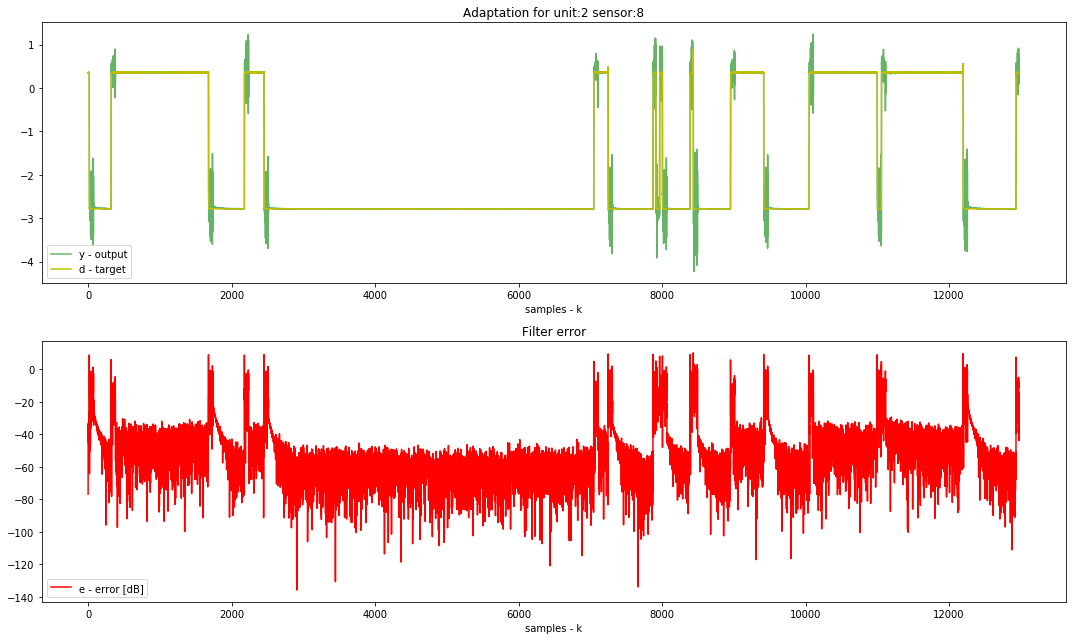

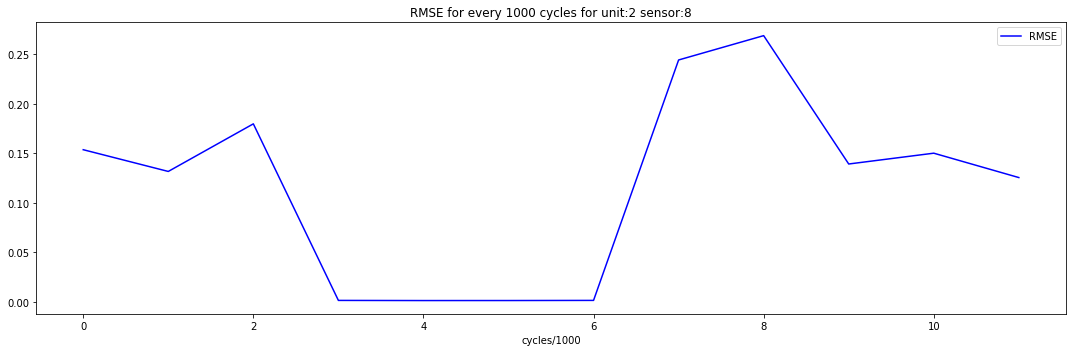

  0%|          | 2969/848329 [00:00<00:28, 29685.43it/s]

sensor loop 9: FIXTURETILTANGLE
RLS for adaptation(other cycles)


 22%|██▏       | 2891/12977 [00:00<00:00, 28900.38it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 28971.64it/s]


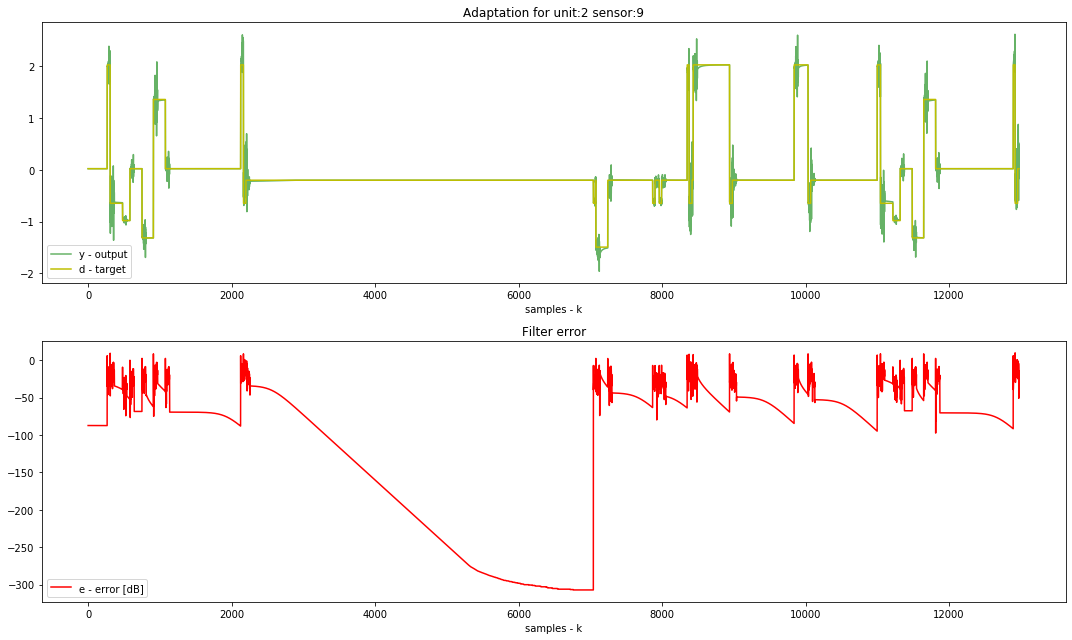

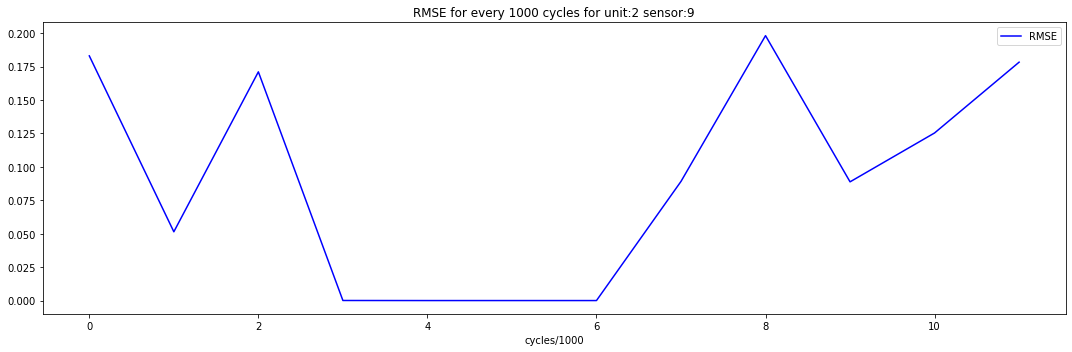

  0%|          | 2930/848329 [00:00<00:28, 29298.56it/s]

sensor loop 10: ACTUALSTEPDURATION
RLS for adaptation(other cycles)


 22%|██▏       | 2831/12977 [00:00<00:00, 28303.68it/s]

RLS for selected sensor


100%|██████████| 12977/12977 [00:00<00:00, 28498.32it/s]


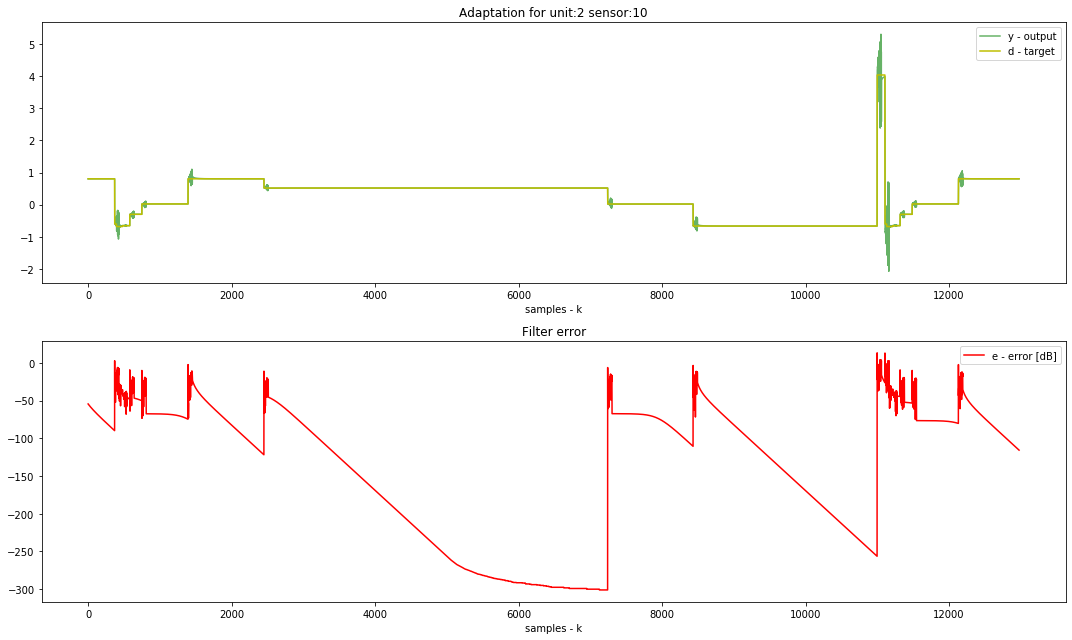

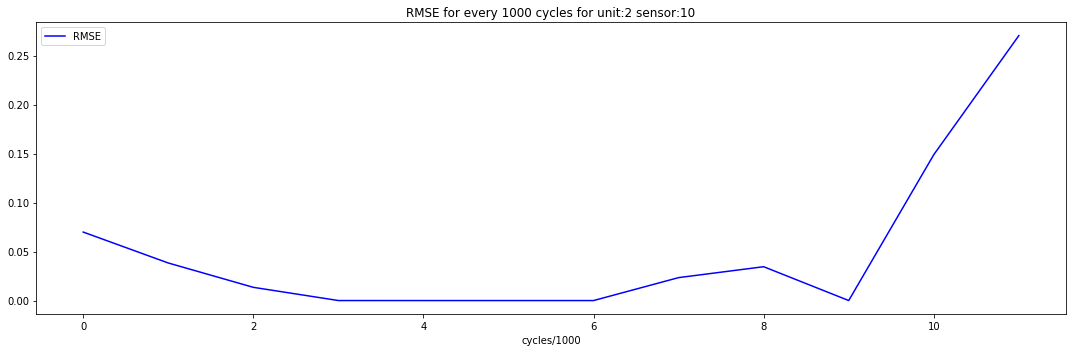

sequence_cols ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'FIXTURETILTANGLE', 'ACTUALSTEPDURATION']
sequence generated, concatenating...
 data_matrix.shape (131034, 11)
 data_matrix.shape (13039, 11)
 data_matrix.shape (442303, 11)
 data_matrix.shape (47392, 11)
 data_matrix.shape (133923, 11)
 data_matrix.shape (66772, 11)
 data_matrix.shape (21431, 11)
concatenated!
 data_matrix.shape (5902, 11)


  0%|          | 2978/855466 [00:00<00:28, 29772.36it/s]

sensor loop 0: IONGAUGEPRESSURE
RLS for adaptation(other cycles)


 49%|████▉     | 2871/5840 [00:00<00:00, 28705.85it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 28283.15it/s]


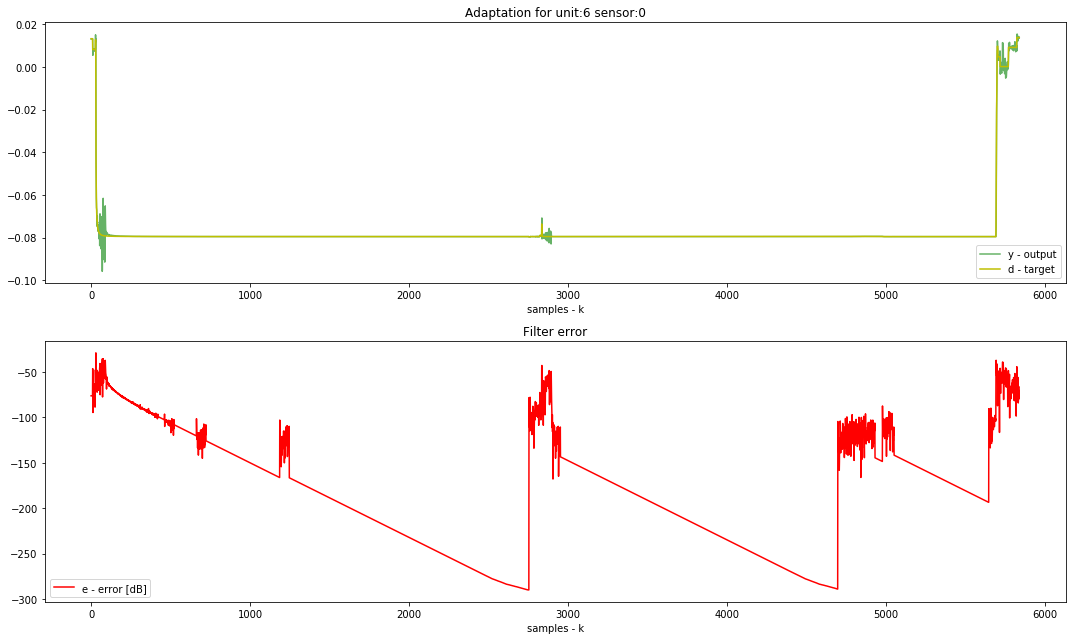

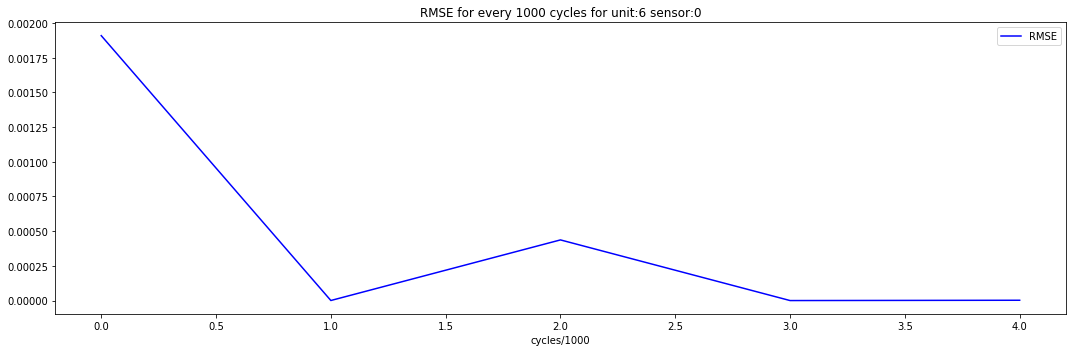

  0%|          | 2774/855466 [00:00<00:30, 27731.70it/s]

sensor loop 1: ETCHBEAMVOLTAGE
RLS for adaptation(other cycles)


 49%|████▉     | 2881/5840 [00:00<00:00, 28801.51it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 28545.02it/s]


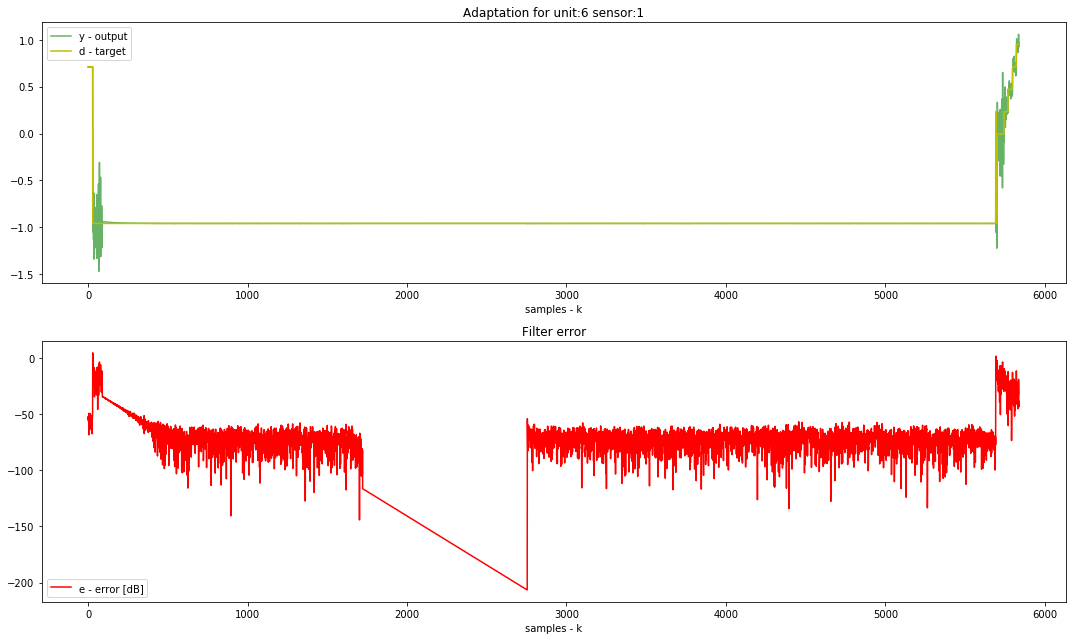

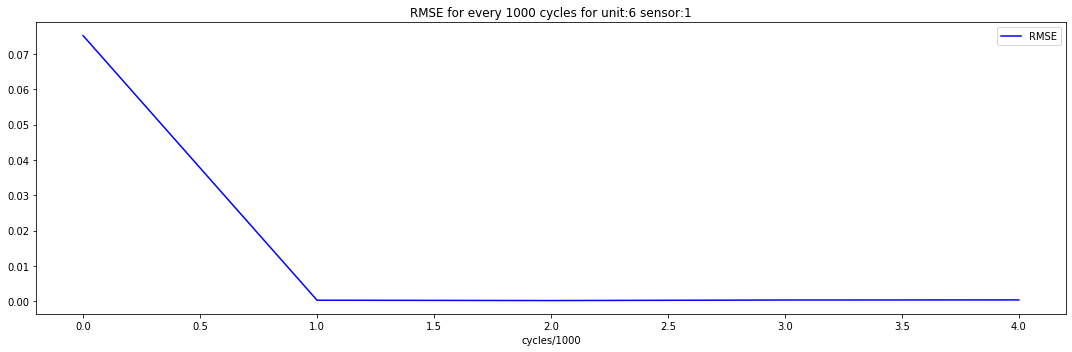

  0%|          | 3140/855466 [00:00<00:27, 31398.23it/s]

sensor loop 2: ETCHBEAMCURRENT
RLS for adaptation(other cycles)


 48%|████▊     | 2817/5840 [00:00<00:00, 28160.36it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 28009.16it/s]


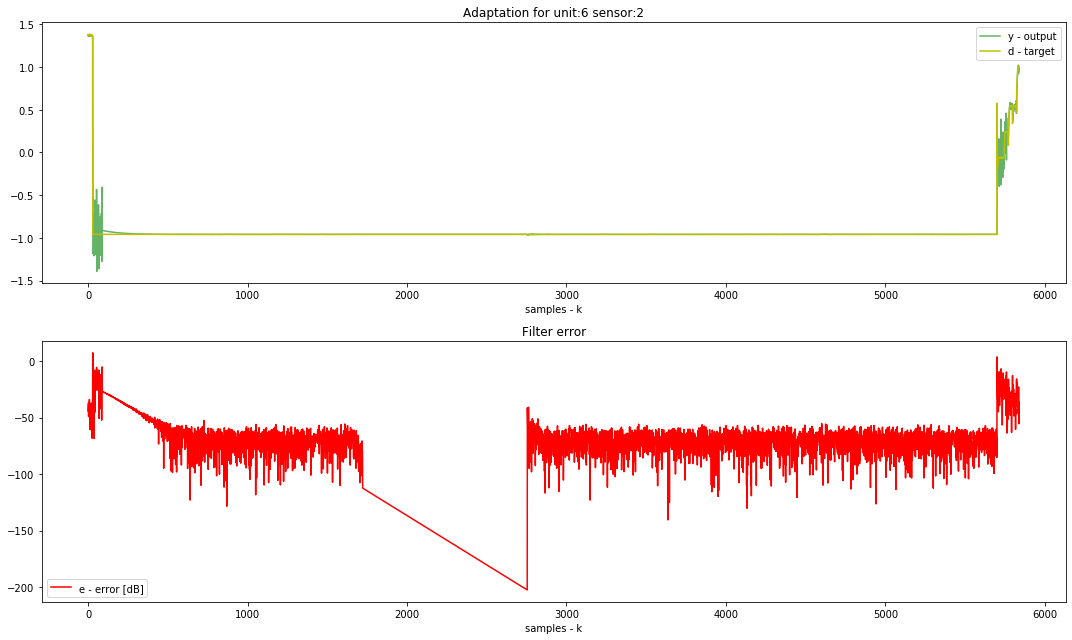

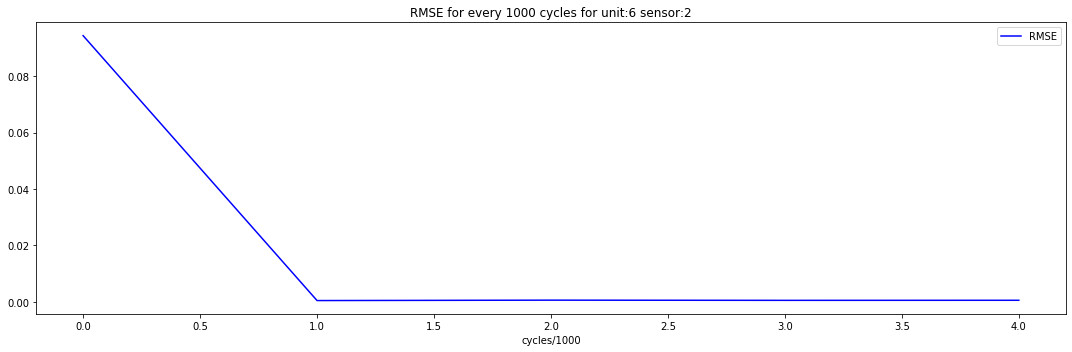

  0%|          | 2665/855466 [00:00<00:32, 26645.39it/s]

sensor loop 3: ETCHSUPPRESSORVOLTAGE
RLS for adaptation(other cycles)


 46%|████▌     | 2671/5840 [00:00<00:00, 26702.13it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 27048.79it/s]


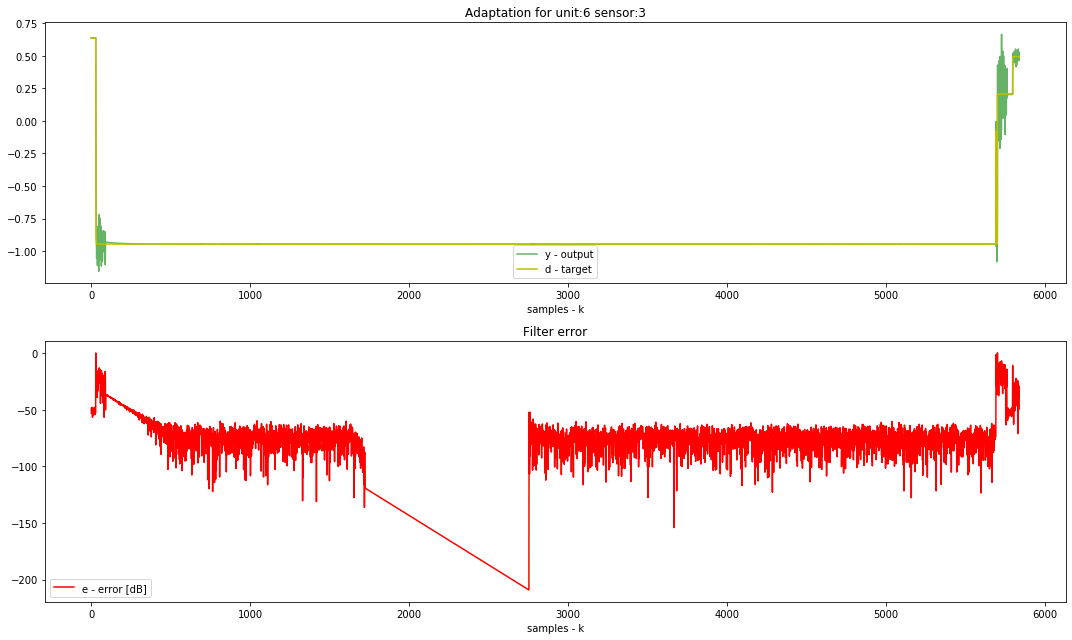

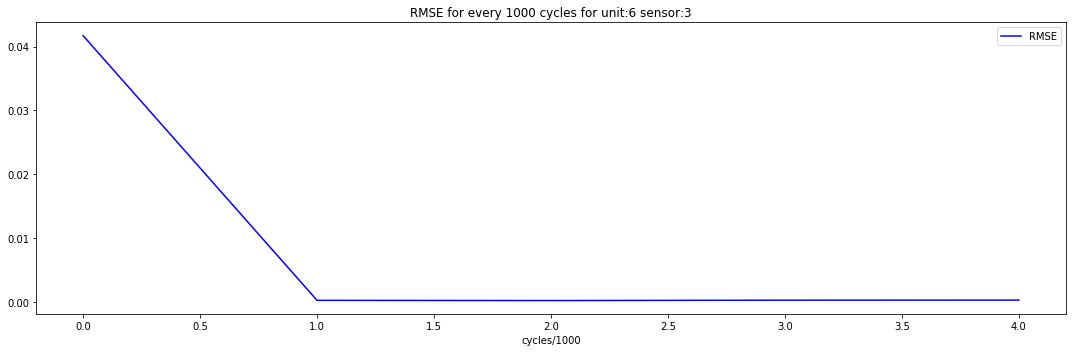

  0%|          | 2803/855466 [00:00<00:30, 28022.28it/s]

sensor loop 4: ETCHSUPPRESSORCURRENT
RLS for adaptation(other cycles)


 42%|████▏     | 2436/5840 [00:00<00:00, 24357.82it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 24600.10it/s]


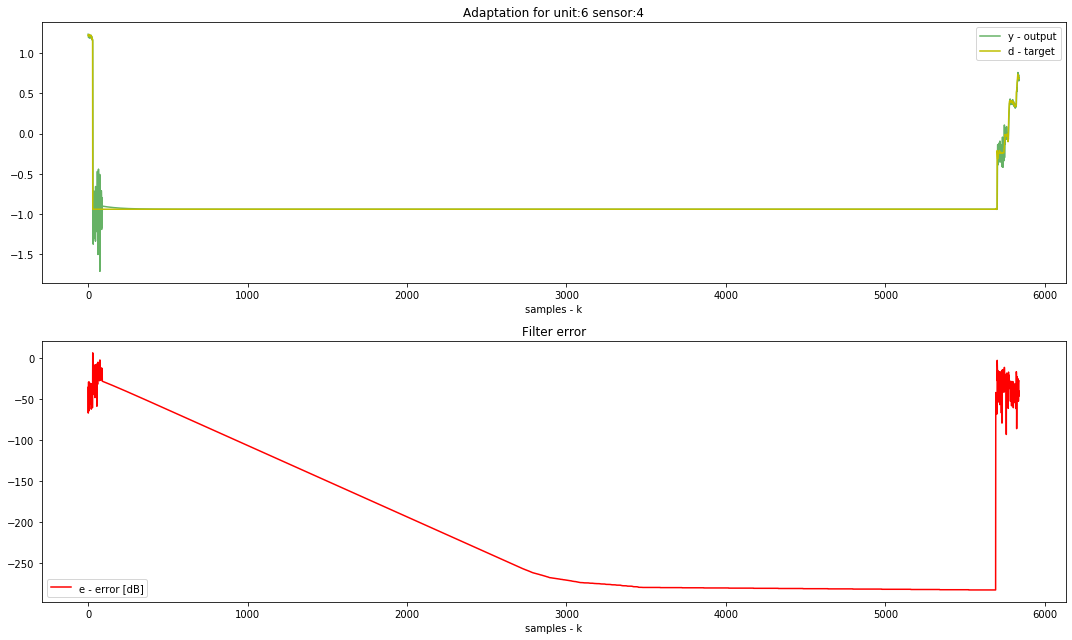

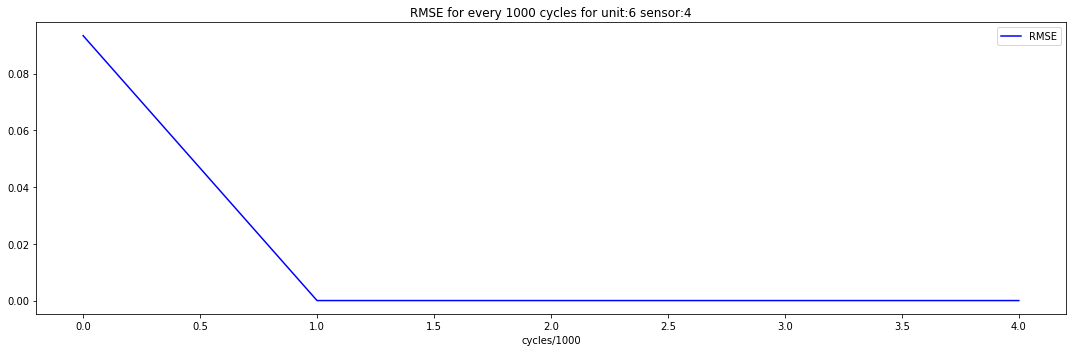

  0%|          | 2863/855466 [00:00<00:29, 28628.12it/s]

sensor loop 5: FLOWCOOLFLOWRATE
RLS for adaptation(other cycles)


 45%|████▌     | 2636/5840 [00:00<00:00, 26354.75it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 25424.01it/s]


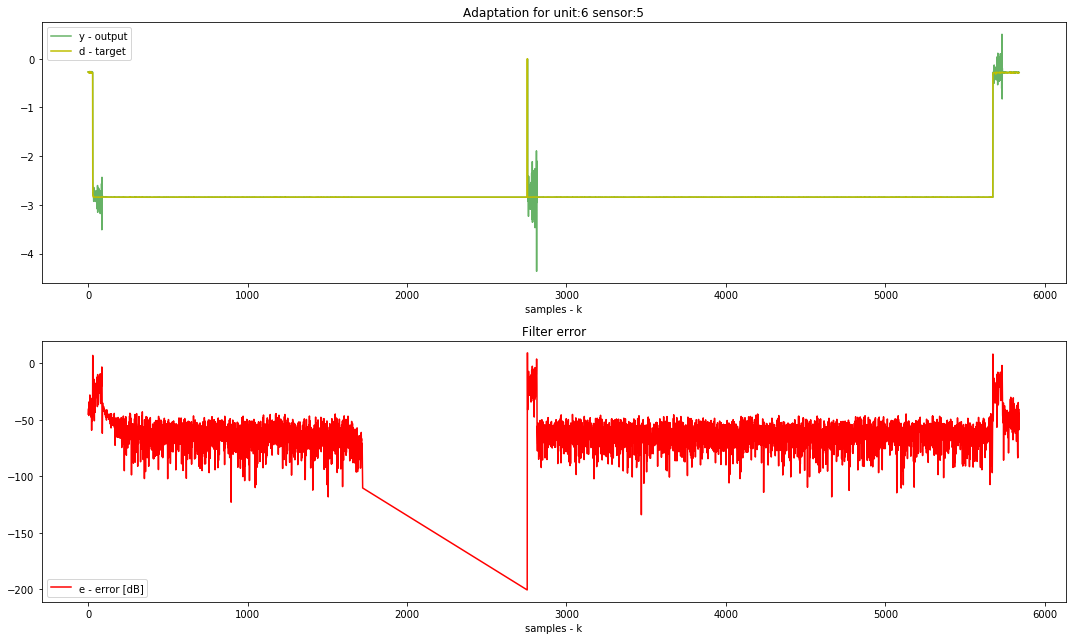

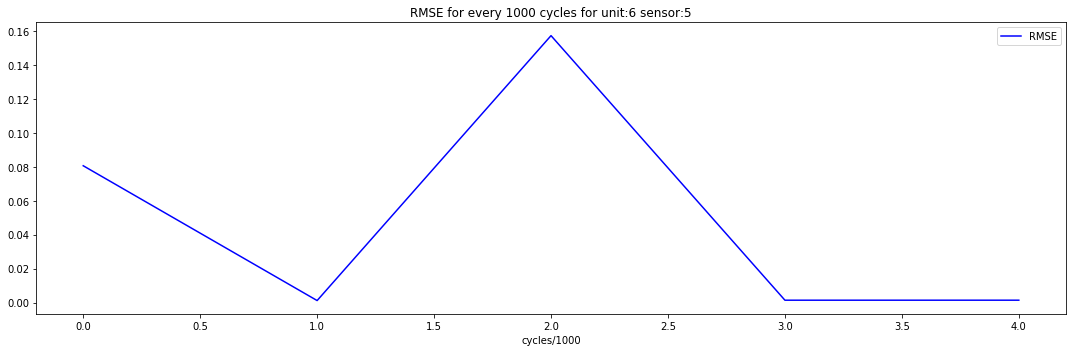

  0%|          | 2808/855466 [00:00<00:30, 28070.66it/s]

sensor loop 6: FLOWCOOLPRESSURE
RLS for adaptation(other cycles)


 39%|███▉      | 2291/5840 [00:00<00:00, 22906.09it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 23322.30it/s]


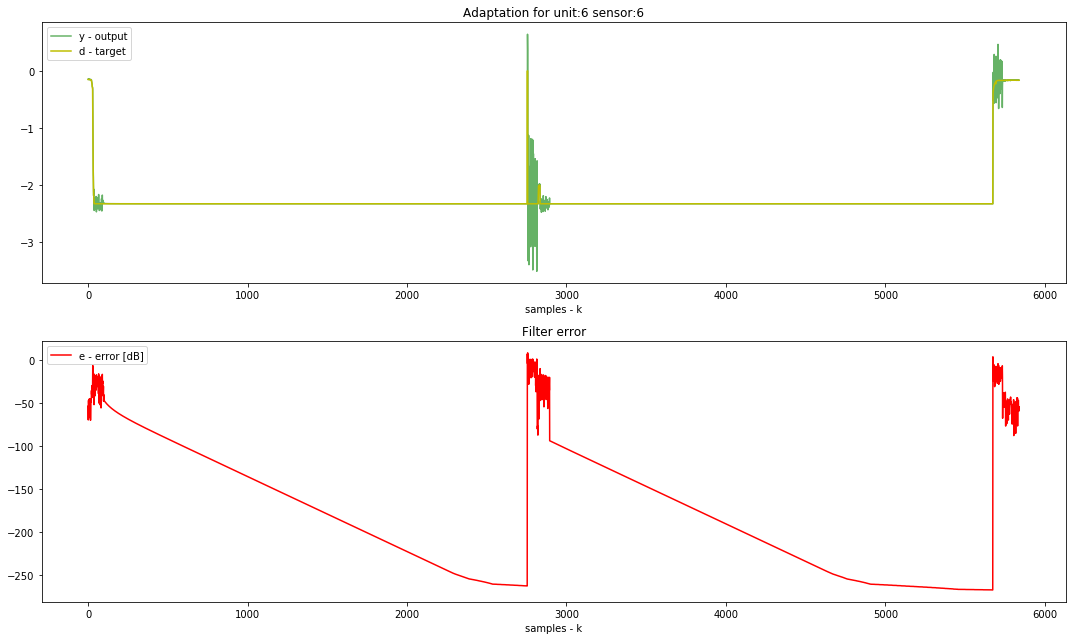

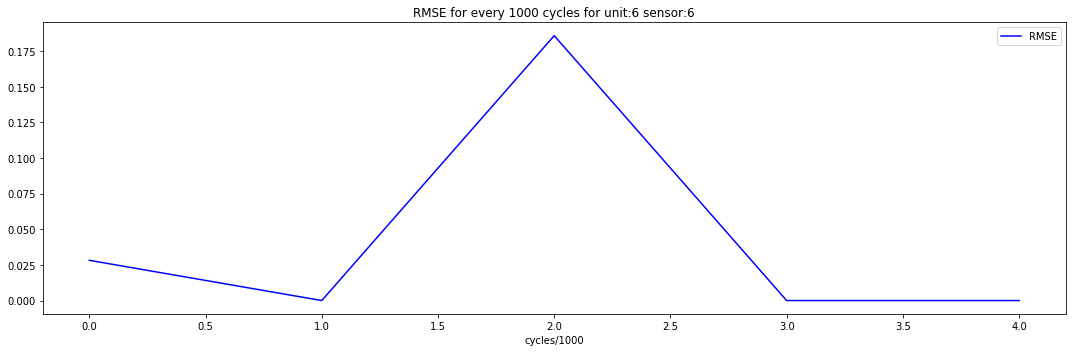

  0%|          | 2488/855466 [00:00<00:34, 24876.11it/s]

sensor loop 7: ETCHGASCHANNEL1READBACK
RLS for adaptation(other cycles)


 47%|████▋     | 2758/5840 [00:00<00:00, 27574.44it/s]

RLS for selected sensor


100%|██████████| 5840/5840 [00:00<00:00, 27696.23it/s]


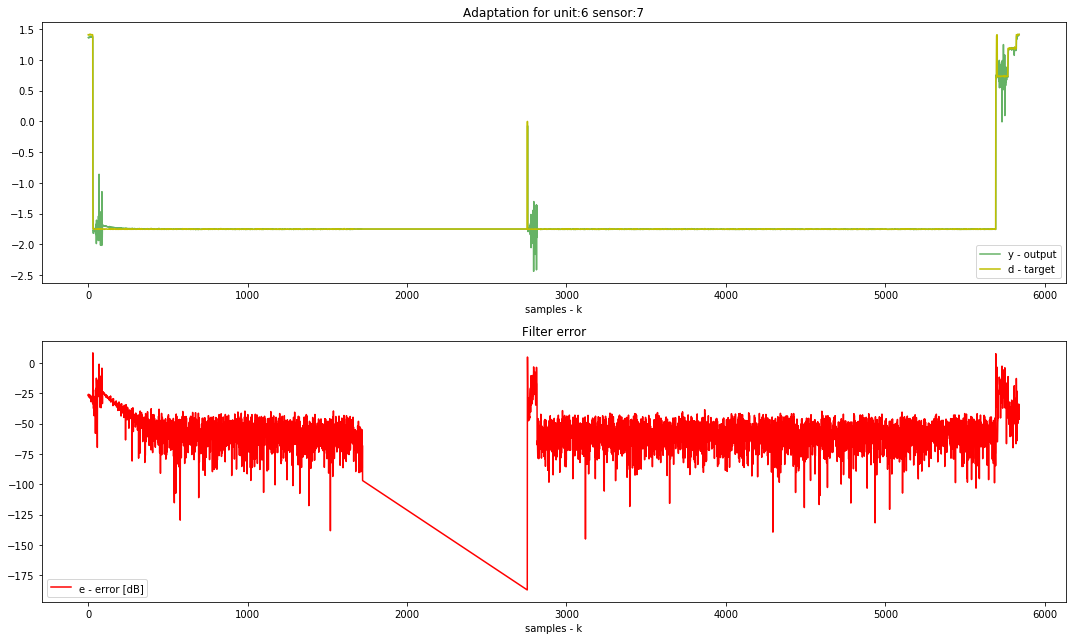

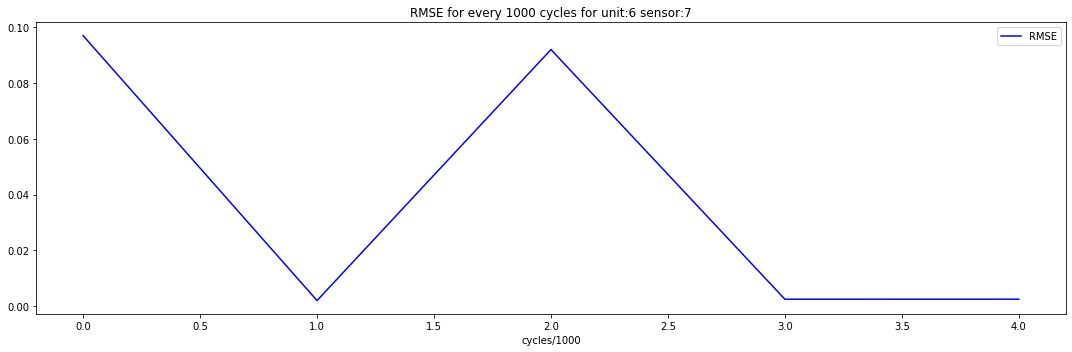

  0%|          | 3031/855466 [00:00<00:28, 30301.00it/s]

sensor loop 8: ETCHPBNGASREADBACK
RLS for adaptation(other cycles)


 18%|█▊        | 149736/855466 [00:05<00:25, 27859.86it/s]

In [ ]:
'''
Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION',
       'TTF_FlowCool Pressure Dropped Below Limit',
       'TTF_Flowcool Pressure Too High Check Flowcool Pump',
       'TTF_Flowcool leak', 'failure_cycle'],
      dtype='object')


'''
sensor_idx = ['IONGAUGEPRESSURE','ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE',
              'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE',
              'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
              'FIXTURETILTANGLE','ACTUALSTEPDURATION']



for cycle in cycle_list:
    # pick the feature columns
    sensor_dataframe = df_train_ttf_merged.drop(columns=['time','Tool', 'stage' , 'runnum', 'Lot','recipe','recipe_step',
                                                         'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
                                                          'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER',
                                                         'FIXTURESHUTTERPOSITION','TTF_FlowCool Pressure Dropped Below Limit',
                                                         'TTF_Flowcool Pressure Too High Check Flowcool Pump','TTF_Flowcool leak',
                                                        'failure_cycle'])
    sequence_cols = sensor_dataframe.columns.values.tolist()
    print ("sequence_cols",sequence_cols)

    # generator for the sequences
    # transform each id of the train dataset in a sequence
    seq_gen = (list(gen_sequence(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == id], sequence_length, sequence_cols))
               for id in np.delete(cycle_list,np.where(cycle_list == cycle)))

    # generate sequences and convert to numpy array
    print ("sequence generated, concatenating...")
    seq_array  = np.concatenate(list(seq_gen))
    # seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
#     print(seq_array)

    print ("concatenated!")

    # generator for the sequences
    # transform each id of the train dataset in a sequence
    target_seq_gen = (list(gen_target(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == id], sequence_length, pred_length, sequence_cols))
               for id in np.delete(cycle_list,np.where(cycle_list == cycle)))

    # print ("target_seq_gen", target_seq_gen)
    # generate sequences and convert to numpy array
    target_seq_array  = np.concatenate(list(target_seq_gen))
    # target_seq_array = np.concatenate(list(target_seq_gen)).astype(np.float32)
#     print(target_seq_array)
#     print(target_seq_array.shape)



    # generate RUL labels
    label_gen = [gen_labels(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == id], 
                            sequence_length, ['TTF_FlowCool Pressure Dropped Below Limit'])
                 for id in np.delete(cycle_list,np.where(cycle_list == cycle))]

    label_array = np.concatenate(label_gen).astype(np.float32)

    
    ## sequence of time series data and target measurement values for selected machine (unit_id_idx)
    seq_gen_m_id = (list(gen_sequence(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == cycle], sequence_length, sequence_cols))
               )

    # generate sequences and convert to numpy array
    seq_array_m_id  = np.array(list(seq_gen_m_id))
    # seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
    # print(seq_array_m_id)
#     print(seq_array_m_id.shape)



    # generator for the sequences
    # transform each id of the train dataset in a sequence
    target_seq_gen_m_id = (list(gen_target(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == cycle], sequence_length, pred_length, sequence_cols))
               )

    # print ("target_seq_gen", target_seq_gen)
    # generate sequences and convert to numpy array
    target_seq_array_m_id  = np.array(list(target_seq_gen_m_id))
    # target_seq_array = np.concatenate(list(target_seq_gen)).astype(np.float32)
    # print(target_seq_array_m_id)
#     print(target_seq_array_m_id.shape)
    
    
    

    for s_i in range(len(sensor_idx)):
        print ("sensor loop %s: %s" %(s_i,sensor_idx[s_i] ))


        ### Prediction error estimation with RLS

        ## Check data shape (last instance of each unit is excluded)
    #     print ("other sensors input data shape: " , seq_array[:,:,0].shape)
    #     print ("other sensors target measurement shape: ", target_seq_array[:,:,0].shape)
    #     print ("RUL array shape: ", label_array.shape)

        ## Apadt model first
        ## An example how to filter data measured in real-time
        # these two function supplement your online measurment

        s2_input_array = seq_array[:,:,s_i]
        s2_target_array = target_seq_array[:,:,s_i]

        N = s2_input_array.shape[0]
        log_d = np.zeros(N)
        log_y = np.zeros(N)
        filt = pa.filters.FilterRLS(sequence_length, mu=0.99)
        
        print ("RLS for adaptation(other cycles)")
        for k in tqdm(range(N-1)):
            # measure input
#             print ("k",k)
            x = s2_input_array[k]
        #     print (x)
        #     print (x.shape)
            # predict new value
            y = filt.predict(x)
            # do the important stuff with prediction output
#             pass    
            # measure output
            d = s2_target_array[k]
        #     print ("d", d)
        #     print ("y", y)
            # update filter
            filt.adapt(d, x)
#             # log values
#             log_d[k] = d
#             log_y[k] = y

            
        #only sensor_02

        s2_input_m_id = seq_array_m_id[:,:,s_i]
        s2_target_m_id = target_seq_array_m_id[:,:,s_i]


        N = s2_input_m_id.shape[0]
        log_d = np.zeros(N-1)
        log_y = np.zeros(N-1)
        print ("RLS for selected sensor")
        for k in tqdm(range(N-1)):
            # measure input
#             print ("k",k)
            x = s2_input_m_id[k]
        #     print (x)
        #     print (x.shape)
            # predict new value
            y = filt.predict(x)
            # do the important stuff with prediction output
#             pass    
            # measure output
            d = s2_target_m_id[k]
    #         print ("d", d)
    #         print ("y", y)
            # update filter
            filt.adapt(d, x)
            # log values
            log_d[k] = d
            log_y[k] = y





        ### show results
        plt.figure(figsize=(15,9))
        plt.subplot(211);plt.title("Adaptation for unit:%s sensor:%s" %(cycle,s_i));plt.xlabel("samples - k")
        plt.plot(log_y,"g", alpha=0.6,label="y - output")
        plt.plot(log_d,"y", label="d - target");plt.legend()
        plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
        plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
        plt.legend(); plt.tight_layout(); plt.show()




        ## Numerical evaluation


        y_actual = log_d
        y_predicted = log_y

        first_n_rmse = sqrt(mean_squared_error(y_actual[:n], y_predicted[:n]))
        last_n_rmse = sqrt(mean_squared_error(y_actual[-n:], y_predicted[-n:]))

    #     print ("first %s cycles RMSE of prediction: %s" %(n,first_n_rmse))
    #     print ("last %s cycles RMSE of prediction: %s" %(n,last_n_rmse))





        '''
        RMSE evaluation with fixed window size n
        '''

        # s2_input_m_id = seq_array_m_id[:,:,sensor_idx]
        # s2_target_m_id = target_seq_array_m_id[:,:,sensor_idx]
        # x = s2_input_m_id
        # d = s2_target_m_id

        # y, e, w = filt.run(d, x)
        # y_actual = d
        # y_predicted = y





    #     print (len(y_predicted))
    #     print (int(len(y_predicted)/n))
        rmse_list = []
        for iter in range(int(len(y_predicted)/n)) :
            rmse_temp = sqrt(mean_squared_error(y_actual[n*iter:n*(iter+1)], y_predicted[n*iter:n*(iter+1)]))
            rmse_list.append(rmse_temp)



    #     print (rmse_list)

        ### show results
        fig_rmse = plt.figure(figsize=(15,5))
        plt.plot(rmse_list,"b", label="RMSE")
        plt.xlabel("cycles/%s" %n)
        plt.title("RMSE for every %s cycles for unit:%s sensor:%s" %(n,cycle,s_i))
        plt.legend(); plt.tight_layout(); plt.show()
        fig_rmse.savefig("plots/rmse_u_%s_s_%s.png" %(cycle,s_i))
        
        
        
        filt = 0
